### 1. Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Import dataset, creating data frame and displaying first five rows

In [2]:
df = pd.read_excel(r'C:/Users/Rohit Kachhal/Data Science Program/Internship/Final For Submission/Used Car Price Prediction/Used_Car_Data.xls')
df.head()

,Unnamed: 0,Name,Model,Km_Driven,No_Of_Owner,Fuel_Type,Price
0,0,2014 Nissan Terrano,XV 110 DIESEL Manual,"43,866 km",1st Owner,Diesel,"₹4,76,199"
1,1,2012 Maruti Swift,VDI Manual,"1,20,326 km",2nd Owner,Diesel,"₹2,60,099"
2,2,2009 Maruti Zen Estilo,VXI Manual,"44,191 km",1st Owner,Petrol,"₹2,11,499"
3,3,2012 Maruti Swift,ZXI Manual,"79,744 km",1st Owner,Petrol,"₹3,95,299"
4,4,2015 Maruti Swift,VDI ABS Manual,"89,196 km",1st Owner,Diesel,"₹4,14,499"


### 3. Explore Data Frame

#### a). Data Frame Shape

In [3]:
df.shape

(5545, 7)

#### b). Data Frame Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5545 entries, 0 to 5544
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5545 non-null   int64 
 1   Name         5545 non-null   object
 2   Model        5545 non-null   object
 3   Km_Driven    5545 non-null   object
 4   No_Of_Owner  5545 non-null   object
 5   Fuel_Type    5545 non-null   object
 6   Price        5545 non-null   object
dtypes: int64(1), object(6)
memory usage: 303.4+ KB


##### Outcome :
* There are 6 column
* 1 out of 6 is of int type.
* 5 out of 6 are of object type.
* 'Unnamed: 0' is useless as it contains the index. Data Frame has own index so drop it.
* 'Name' contain manufacture year, brand name & model name so need to extract into separate columns.To be done in data cleaning.
* 'Model' contain variant & transmission type so need to extract into separate columns.To be done in data cleaning.
* 'Km_Driven' contain , & km so need to replace it by blank.To be done in data cleaning.
* 'Price' contain ₹ & , so need to replace it by blank.To be done in data cleaning.

### 4. Data Cleaning

In [5]:
# Extracting Manufacturing_Year from Name
df['Manufacturing_Year'] = df['Name'].str.partition(' ')[0]
df

,Unnamed: 0,Name,Model,Km_Driven,No_Of_Owner,Fuel_Type,Price,Manufacturing_Year
0,0,2014 Nissan Terrano,XV 110 DIESEL Manual,"43,866 km",1st Owner,Diesel,"₹4,76,199",2014
1,1,2012 Maruti Swift,VDI Manual,"1,20,326 km",2nd Owner,Diesel,"₹2,60,099",2012
2,2,2009 Maruti Zen Estilo,VXI Manual,"44,191 km",1st Owner,Petrol,"₹2,11,499",2009
3,3,2012 Maruti Swift,ZXI Manual,"79,744 km",1st Owner,Petrol,"₹3,95,299",2012
4,4,2015 Maruti Swift,VDI ABS Manual,"89,196 km",1st Owner,Diesel,"₹4,14,499",2015
...,...,...,...,...,...,...,...,...
5540,5540,2017 Maruti Ciaz,ALPHA 1.3 DDIS SHVS Manual,"93,258 km",1st Owner,Diesel,"₹6,91,099",2017
5541,5541,2018 Skoda Rapid,Style 1.5 TDI AT Automatic,"64,861 km",1st Owner,Diesel,"₹10,77,299",2018
5542,5542,2017 Renault Kwid,RXT Manual,"22,293 km",1st Owner,Petrol,"₹3,69,799",2017
5543,5543,2017 Hyundai Grand i10,MAGNA 1.2 KAPPA VTVT Manual,"15,038 km",1st Owner,Petrol,"₹4,84,999",2017


In [6]:
# Extracting Brand_Name from Name
df['Brand_Name'] = df['Name'].str.partition(' ')[2].str.partition(' ')[0]
df

,Unnamed: 0,Name,Model,Km_Driven,No_Of_Owner,Fuel_Type,Price,Manufacturing_Year,Brand_Name
0,0,2014 Nissan Terrano,XV 110 DIESEL Manual,"43,866 km",1st Owner,Diesel,"₹4,76,199",2014,Nissan
1,1,2012 Maruti Swift,VDI Manual,"1,20,326 km",2nd Owner,Diesel,"₹2,60,099",2012,Maruti
2,2,2009 Maruti Zen Estilo,VXI Manual,"44,191 km",1st Owner,Petrol,"₹2,11,499",2009,Maruti
3,3,2012 Maruti Swift,ZXI Manual,"79,744 km",1st Owner,Petrol,"₹3,95,299",2012,Maruti
4,4,2015 Maruti Swift,VDI ABS Manual,"89,196 km",1st Owner,Diesel,"₹4,14,499",2015,Maruti
...,...,...,...,...,...,...,...,...,...
5540,5540,2017 Maruti Ciaz,ALPHA 1.3 DDIS SHVS Manual,"93,258 km",1st Owner,Diesel,"₹6,91,099",2017,Maruti
5541,5541,2018 Skoda Rapid,Style 1.5 TDI AT Automatic,"64,861 km",1st Owner,Diesel,"₹10,77,299",2018,Skoda
5542,5542,2017 Renault Kwid,RXT Manual,"22,293 km",1st Owner,Petrol,"₹3,69,799",2017,Renault
5543,5543,2017 Hyundai Grand i10,MAGNA 1.2 KAPPA VTVT Manual,"15,038 km",1st Owner,Petrol,"₹4,84,999",2017,Hyundai


In [7]:
# Extracting Model_Name from Name
df['Model_Name'] = df['Name'].str.partition(' ')[2].str.partition(' ')[2]
df

,Unnamed: 0,Name,Model,Km_Driven,No_Of_Owner,Fuel_Type,Price,Manufacturing_Year,Brand_Name,Model_Name
0,0,2014 Nissan Terrano,XV 110 DIESEL Manual,"43,866 km",1st Owner,Diesel,"₹4,76,199",2014,Nissan,Terrano
1,1,2012 Maruti Swift,VDI Manual,"1,20,326 km",2nd Owner,Diesel,"₹2,60,099",2012,Maruti,Swift
2,2,2009 Maruti Zen Estilo,VXI Manual,"44,191 km",1st Owner,Petrol,"₹2,11,499",2009,Maruti,Zen Estilo
3,3,2012 Maruti Swift,ZXI Manual,"79,744 km",1st Owner,Petrol,"₹3,95,299",2012,Maruti,Swift
4,4,2015 Maruti Swift,VDI ABS Manual,"89,196 km",1st Owner,Diesel,"₹4,14,499",2015,Maruti,Swift
...,...,...,...,...,...,...,...,...,...,...
5540,5540,2017 Maruti Ciaz,ALPHA 1.3 DDIS SHVS Manual,"93,258 km",1st Owner,Diesel,"₹6,91,099",2017,Maruti,Ciaz
5541,5541,2018 Skoda Rapid,Style 1.5 TDI AT Automatic,"64,861 km",1st Owner,Diesel,"₹10,77,299",2018,Skoda,Rapid
5542,5542,2017 Renault Kwid,RXT Manual,"22,293 km",1st Owner,Petrol,"₹3,69,799",2017,Renault,Kwid
5543,5543,2017 Hyundai Grand i10,MAGNA 1.2 KAPPA VTVT Manual,"15,038 km",1st Owner,Petrol,"₹4,84,999",2017,Hyundai,Grand i10


In [8]:
# Extracting Variant from Model
df['Variant'] = df['Model'].str.partition('Manual')[0].str.partition('Automatic')[0]
df

,Unnamed: 0,Name,Model,Km_Driven,No_Of_Owner,Fuel_Type,Price,Manufacturing_Year,Brand_Name,Model_Name,Variant
0,0,2014 Nissan Terrano,XV 110 DIESEL Manual,"43,866 km",1st Owner,Diesel,"₹4,76,199",2014,Nissan,Terrano,XV 110 DIESEL
1,1,2012 Maruti Swift,VDI Manual,"1,20,326 km",2nd Owner,Diesel,"₹2,60,099",2012,Maruti,Swift,VDI
2,2,2009 Maruti Zen Estilo,VXI Manual,"44,191 km",1st Owner,Petrol,"₹2,11,499",2009,Maruti,Zen Estilo,VXI
3,3,2012 Maruti Swift,ZXI Manual,"79,744 km",1st Owner,Petrol,"₹3,95,299",2012,Maruti,Swift,ZXI
4,4,2015 Maruti Swift,VDI ABS Manual,"89,196 km",1st Owner,Diesel,"₹4,14,499",2015,Maruti,Swift,VDI ABS
...,...,...,...,...,...,...,...,...,...,...,...
5540,5540,2017 Maruti Ciaz,ALPHA 1.3 DDIS SHVS Manual,"93,258 km",1st Owner,Diesel,"₹6,91,099",2017,Maruti,Ciaz,ALPHA 1.3 DDIS SHVS
5541,5541,2018 Skoda Rapid,Style 1.5 TDI AT Automatic,"64,861 km",1st Owner,Diesel,"₹10,77,299",2018,Skoda,Rapid,Style 1.5 TDI AT
5542,5542,2017 Renault Kwid,RXT Manual,"22,293 km",1st Owner,Petrol,"₹3,69,799",2017,Renault,Kwid,RXT
5543,5543,2017 Hyundai Grand i10,MAGNA 1.2 KAPPA VTVT Manual,"15,038 km",1st Owner,Petrol,"₹4,84,999",2017,Hyundai,Grand i10,MAGNA 1.2 KAPPA VTVT


In [9]:
# Extracting Transmission_Type from Model
df['T1'] = df['Model'].str.partition('Manual')[1]
df['T2'] = df['Model'].str.partition('Automatic')[1]
df['Transmission_Type'] = df['T1'].str.cat(df['T2'])
df.drop(columns=['T1','T2'],axis=1,inplace=True)
df

,Unnamed: 0,Name,Model,Km_Driven,No_Of_Owner,Fuel_Type,Price,Manufacturing_Year,Brand_Name,Model_Name,Variant,Transmission_Type
0,0,2014 Nissan Terrano,XV 110 DIESEL Manual,"43,866 km",1st Owner,Diesel,"₹4,76,199",2014,Nissan,Terrano,XV 110 DIESEL,Manual
1,1,2012 Maruti Swift,VDI Manual,"1,20,326 km",2nd Owner,Diesel,"₹2,60,099",2012,Maruti,Swift,VDI,Manual
2,2,2009 Maruti Zen Estilo,VXI Manual,"44,191 km",1st Owner,Petrol,"₹2,11,499",2009,Maruti,Zen Estilo,VXI,Manual
3,3,2012 Maruti Swift,ZXI Manual,"79,744 km",1st Owner,Petrol,"₹3,95,299",2012,Maruti,Swift,ZXI,Manual
4,4,2015 Maruti Swift,VDI ABS Manual,"89,196 km",1st Owner,Diesel,"₹4,14,499",2015,Maruti,Swift,VDI ABS,Manual
...,...,...,...,...,...,...,...,...,...,...,...,...
5540,5540,2017 Maruti Ciaz,ALPHA 1.3 DDIS SHVS Manual,"93,258 km",1st Owner,Diesel,"₹6,91,099",2017,Maruti,Ciaz,ALPHA 1.3 DDIS SHVS,Manual
5541,5541,2018 Skoda Rapid,Style 1.5 TDI AT Automatic,"64,861 km",1st Owner,Diesel,"₹10,77,299",2018,Skoda,Rapid,Style 1.5 TDI AT,Automatic
5542,5542,2017 Renault Kwid,RXT Manual,"22,293 km",1st Owner,Petrol,"₹3,69,799",2017,Renault,Kwid,RXT,Manual
5543,5543,2017 Hyundai Grand i10,MAGNA 1.2 KAPPA VTVT Manual,"15,038 km",1st Owner,Petrol,"₹4,84,999",2017,Hyundai,Grand i10,MAGNA 1.2 KAPPA VTVT,Manual


In [10]:
# Droping unwanted columns
df.drop(columns=['Unnamed: 0','Name','Model'],axis=1,inplace=True)
df

,Km_Driven,No_Of_Owner,Fuel_Type,Price,Manufacturing_Year,Brand_Name,Model_Name,Variant,Transmission_Type
0,"43,866 km",1st Owner,Diesel,"₹4,76,199",2014,Nissan,Terrano,XV 110 DIESEL,Manual
1,"1,20,326 km",2nd Owner,Diesel,"₹2,60,099",2012,Maruti,Swift,VDI,Manual
2,"44,191 km",1st Owner,Petrol,"₹2,11,499",2009,Maruti,Zen Estilo,VXI,Manual
3,"79,744 km",1st Owner,Petrol,"₹3,95,299",2012,Maruti,Swift,ZXI,Manual
4,"89,196 km",1st Owner,Diesel,"₹4,14,499",2015,Maruti,Swift,VDI ABS,Manual
...,...,...,...,...,...,...,...,...,...
5540,"93,258 km",1st Owner,Diesel,"₹6,91,099",2017,Maruti,Ciaz,ALPHA 1.3 DDIS SHVS,Manual
5541,"64,861 km",1st Owner,Diesel,"₹10,77,299",2018,Skoda,Rapid,Style 1.5 TDI AT,Automatic
5542,"22,293 km",1st Owner,Petrol,"₹3,69,799",2017,Renault,Kwid,RXT,Manual
5543,"15,038 km",1st Owner,Petrol,"₹4,84,999",2017,Hyundai,Grand i10,MAGNA 1.2 KAPPA VTVT,Manual


In [11]:
# Rearrange the order of column
df = df[['Brand_Name','Model_Name','Variant','Fuel_Type','Manufacturing_Year','Transmission_Type','Km_Driven','No_Of_Owner','Price']]
df

,Brand_Name,Model_Name,Variant,Fuel_Type,Manufacturing_Year,Transmission_Type,Km_Driven,No_Of_Owner,Price
0,Nissan,Terrano,XV 110 DIESEL,Diesel,2014,Manual,"43,866 km",1st Owner,"₹4,76,199"
1,Maruti,Swift,VDI,Diesel,2012,Manual,"1,20,326 km",2nd Owner,"₹2,60,099"
2,Maruti,Zen Estilo,VXI,Petrol,2009,Manual,"44,191 km",1st Owner,"₹2,11,499"
3,Maruti,Swift,ZXI,Petrol,2012,Manual,"79,744 km",1st Owner,"₹3,95,299"
4,Maruti,Swift,VDI ABS,Diesel,2015,Manual,"89,196 km",1st Owner,"₹4,14,499"
...,...,...,...,...,...,...,...,...,...
5540,Maruti,Ciaz,ALPHA 1.3 DDIS SHVS,Diesel,2017,Manual,"93,258 km",1st Owner,"₹6,91,099"
5541,Skoda,Rapid,Style 1.5 TDI AT,Diesel,2018,Automatic,"64,861 km",1st Owner,"₹10,77,299"
5542,Renault,Kwid,RXT,Petrol,2017,Manual,"22,293 km",1st Owner,"₹3,69,799"
5543,Hyundai,Grand i10,MAGNA 1.2 KAPPA VTVT,Petrol,2017,Manual,"15,038 km",1st Owner,"₹4,84,999"


In [12]:
# Replacing ',' & 'km' by blank from Km_Driven
df['Km_Driven'] = df['Km_Driven'].str.replace(',','').str.replace('km','')
df

,Brand_Name,Model_Name,Variant,Fuel_Type,Manufacturing_Year,Transmission_Type,Km_Driven,No_Of_Owner,Price
0,Nissan,Terrano,XV 110 DIESEL,Diesel,2014,Manual,43866,1st Owner,"₹4,76,199"
1,Maruti,Swift,VDI,Diesel,2012,Manual,120326,2nd Owner,"₹2,60,099"
2,Maruti,Zen Estilo,VXI,Petrol,2009,Manual,44191,1st Owner,"₹2,11,499"
3,Maruti,Swift,ZXI,Petrol,2012,Manual,79744,1st Owner,"₹3,95,299"
4,Maruti,Swift,VDI ABS,Diesel,2015,Manual,89196,1st Owner,"₹4,14,499"
...,...,...,...,...,...,...,...,...,...
5540,Maruti,Ciaz,ALPHA 1.3 DDIS SHVS,Diesel,2017,Manual,93258,1st Owner,"₹6,91,099"
5541,Skoda,Rapid,Style 1.5 TDI AT,Diesel,2018,Automatic,64861,1st Owner,"₹10,77,299"
5542,Renault,Kwid,RXT,Petrol,2017,Manual,22293,1st Owner,"₹3,69,799"
5543,Hyundai,Grand i10,MAGNA 1.2 KAPPA VTVT,Petrol,2017,Manual,15038,1st Owner,"₹4,84,999"


In [13]:
# Replacing 'Owner' by blank from No_Of_Owner
df['No_Of_Owner'] = df['No_Of_Owner'].str.replace('Owner','')
df

,Brand_Name,Model_Name,Variant,Fuel_Type,Manufacturing_Year,Transmission_Type,Km_Driven,No_Of_Owner,Price
0,Nissan,Terrano,XV 110 DIESEL,Diesel,2014,Manual,43866,1st,"₹4,76,199"
1,Maruti,Swift,VDI,Diesel,2012,Manual,120326,2nd,"₹2,60,099"
2,Maruti,Zen Estilo,VXI,Petrol,2009,Manual,44191,1st,"₹2,11,499"
3,Maruti,Swift,ZXI,Petrol,2012,Manual,79744,1st,"₹3,95,299"
4,Maruti,Swift,VDI ABS,Diesel,2015,Manual,89196,1st,"₹4,14,499"
...,...,...,...,...,...,...,...,...,...
5540,Maruti,Ciaz,ALPHA 1.3 DDIS SHVS,Diesel,2017,Manual,93258,1st,"₹6,91,099"
5541,Skoda,Rapid,Style 1.5 TDI AT,Diesel,2018,Automatic,64861,1st,"₹10,77,299"
5542,Renault,Kwid,RXT,Petrol,2017,Manual,22293,1st,"₹3,69,799"
5543,Hyundai,Grand i10,MAGNA 1.2 KAPPA VTVT,Petrol,2017,Manual,15038,1st,"₹4,84,999"


In [14]:
# Replacing '₹' & ',' by blank from Price
df['Price'] = df['Price'].str.replace('₹','').str.replace(',','')
df

,Brand_Name,Model_Name,Variant,Fuel_Type,Manufacturing_Year,Transmission_Type,Km_Driven,No_Of_Owner,Price
0,Nissan,Terrano,XV 110 DIESEL,Diesel,2014,Manual,43866,1st,476199
1,Maruti,Swift,VDI,Diesel,2012,Manual,120326,2nd,260099
2,Maruti,Zen Estilo,VXI,Petrol,2009,Manual,44191,1st,211499
3,Maruti,Swift,ZXI,Petrol,2012,Manual,79744,1st,395299
4,Maruti,Swift,VDI ABS,Diesel,2015,Manual,89196,1st,414499
...,...,...,...,...,...,...,...,...,...
5540,Maruti,Ciaz,ALPHA 1.3 DDIS SHVS,Diesel,2017,Manual,93258,1st,691099
5541,Skoda,Rapid,Style 1.5 TDI AT,Diesel,2018,Automatic,64861,1st,1077299
5542,Renault,Kwid,RXT,Petrol,2017,Manual,22293,1st,369799
5543,Hyundai,Grand i10,MAGNA 1.2 KAPPA VTVT,Petrol,2017,Manual,15038,1st,484999


### 5. Data preprocessing

In [15]:
# Data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5545 entries, 0 to 5544
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand_Name          5545 non-null   object
 1   Model_Name          5545 non-null   object
 2   Variant             5545 non-null   object
 3   Fuel_Type           5545 non-null   object
 4   Manufacturing_Year  5545 non-null   object
 5   Transmission_Type   5545 non-null   object
 6   Km_Driven           5545 non-null   object
 7   No_Of_Owner         5545 non-null   object
 8   Price               5545 non-null   object
dtypes: object(9)
memory usage: 390.0+ KB


##### Outcome :
* 'Km_Driven' should be int type.
* 'Price' should be int type.

In [16]:
# Converting the data type of column
df[['Km_Driven','Price']] = df[['Km_Driven','Price']].apply(pd.to_numeric)

In [17]:
# Data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5545 entries, 0 to 5544
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand_Name          5545 non-null   object
 1   Model_Name          5545 non-null   object
 2   Variant             5545 non-null   object
 3   Fuel_Type           5545 non-null   object
 4   Manufacturing_Year  5545 non-null   object
 5   Transmission_Type   5545 non-null   object
 6   Km_Driven           5545 non-null   int64 
 7   No_Of_Owner         5545 non-null   object
 8   Price               5545 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 390.0+ KB


In [18]:
# Checking the null values
df.isnull().sum()

Brand_Name            0
Model_Name            0
Variant               0
Fuel_Type             0
Manufacturing_Year    0
Transmission_Type     0
Km_Driven             0
No_Of_Owner           0
Price                 0
dtype: int64

In [19]:
# Checking the value count for each column
for i in df:
    print('The value count for '+i+' are :\n',df[i].value_counts())
    print('------------------------------------------------------')
    print('------------------------------------------------------')

The value count for Brand_Name are :
 Maruti        2610
Hyundai       1253
Ford           398
Honda          358
Renault        192
Toyota         180
Tata           149
Volkswagen     131
Mahindra        56
MG              46
BMW             30
KIA             26
Datsun          25
Jeep            23
Nissan          23
Skoda           20
Audi            14
Mercedes         5
Ssangyong        3
Jaguar           2
Fiat             1
Name: Brand_Name, dtype: int64
------------------------------------------------------
------------------------------------------------------
The value count for Model_Name are :
 Swift           478
Grand i10       357
Ecosport        327
Baleno          300
Elite i20       264
               ... 
Lodgy             1
Micra Active      1
Punto EVO         1
Mobilio           1
Zest              1
Name: Model_Name, Length: 113, dtype: int64
------------------------------------------------------
------------------------------------------------------
The value 

##### Outcome : 
* 'Transmission_Type' has 89 value for which Transmission_Type is not defined so i replace it with 'Not Defined'.

In [20]:
df['Transmission_Type'] = df['Transmission_Type'].replace('','Not Defined')

In [21]:
df['Transmission_Type'].value_counts()

Manual         4460
Automatic       997
Not Defined      88
Name: Transmission_Type, dtype: int64

In [22]:
df

,Brand_Name,Model_Name,Variant,Fuel_Type,Manufacturing_Year,Transmission_Type,Km_Driven,No_Of_Owner,Price
0,Nissan,Terrano,XV 110 DIESEL,Diesel,2014,Manual,43866,1st,476199
1,Maruti,Swift,VDI,Diesel,2012,Manual,120326,2nd,260099
2,Maruti,Zen Estilo,VXI,Petrol,2009,Manual,44191,1st,211499
3,Maruti,Swift,ZXI,Petrol,2012,Manual,79744,1st,395299
4,Maruti,Swift,VDI ABS,Diesel,2015,Manual,89196,1st,414499
...,...,...,...,...,...,...,...,...,...
5540,Maruti,Ciaz,ALPHA 1.3 DDIS SHVS,Diesel,2017,Manual,93258,1st,691099
5541,Skoda,Rapid,Style 1.5 TDI AT,Diesel,2018,Automatic,64861,1st,1077299
5542,Renault,Kwid,RXT,Petrol,2017,Manual,22293,1st,369799
5543,Hyundai,Grand i10,MAGNA 1.2 KAPPA VTVT,Petrol,2017,Manual,15038,1st,484999


In [23]:
# Data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5545 entries, 0 to 5544
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand_Name          5545 non-null   object
 1   Model_Name          5545 non-null   object
 2   Variant             5545 non-null   object
 3   Fuel_Type           5545 non-null   object
 4   Manufacturing_Year  5545 non-null   object
 5   Transmission_Type   5545 non-null   object
 6   Km_Driven           5545 non-null   int64 
 7   No_Of_Owner         5545 non-null   object
 8   Price               5545 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 390.0+ KB


In [24]:
# Unique value
df.nunique()

Brand_Name              21
Model_Name             113
Variant                565
Fuel_Type                4
Manufacturing_Year      14
Transmission_Type        3
Km_Driven             2996
No_Of_Owner              5
Price                 2418
dtype: int64

In [25]:
# Descriptive statistical analysis
df.describe()

,Km_Driven,Price
count,5545.000000,5.545000e+03
mean,44862.528765,6.203578e+05
std,32280.057092,3.151738e+05
min,58.000000,1.716990e+05
25%,21494.000000,4.169990e+05
50%,38289.000000,5.364990e+05
75%,60108.000000,7.246990e+05
max,277105.000000,3.388499e+06


### 6. Exploratory Data Analysis

#### a). Univariant Analysis

#### i. Data visualization of continous column

In [26]:
# Selecting Continues column
df1 = df.select_dtypes(exclude='object')

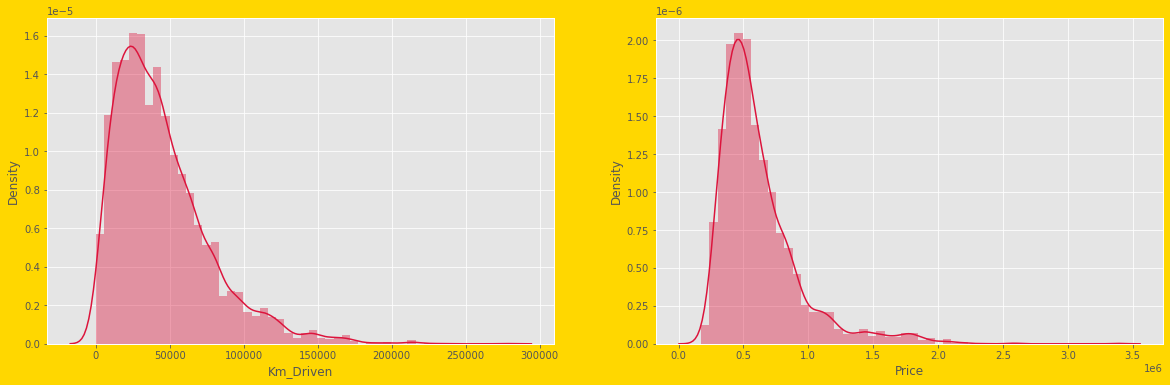

In [27]:
# Visualization  using distplot
plt.figure(figsize=(20,6),facecolor='Gold')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=3:
        ax = plt.subplot(1,2,plot_no)
        sns.distplot(df1[column],color='Crimson')
        plt.xlabel(column,fontsize=12)
    plot_no += 1
plt.show()    

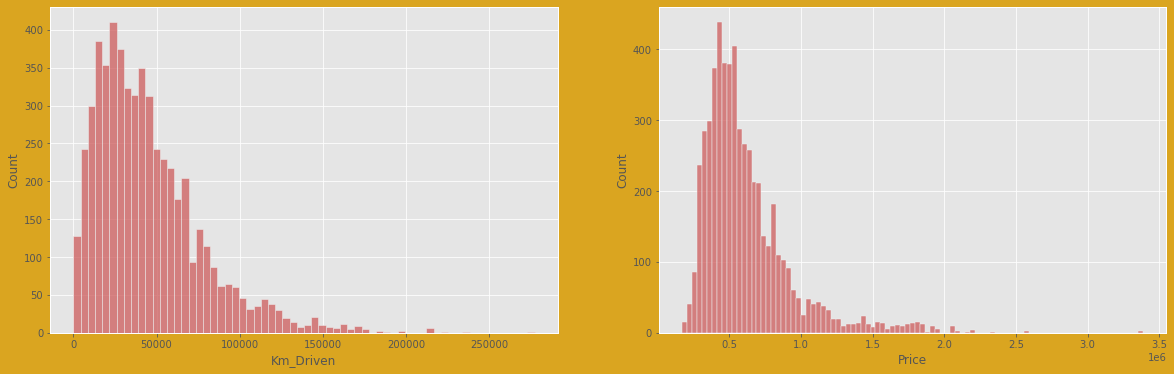

In [28]:
# Visualization  using histplot
plt.figure(figsize=(20,6),facecolor='Goldenrod')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=3:
        ax = plt.subplot(1,2,plot_no)
        sns.histplot(df1[column],color='IndianRed')
        plt.xlabel(column,fontsize=12)
    plot_no += 1
plt.show()    

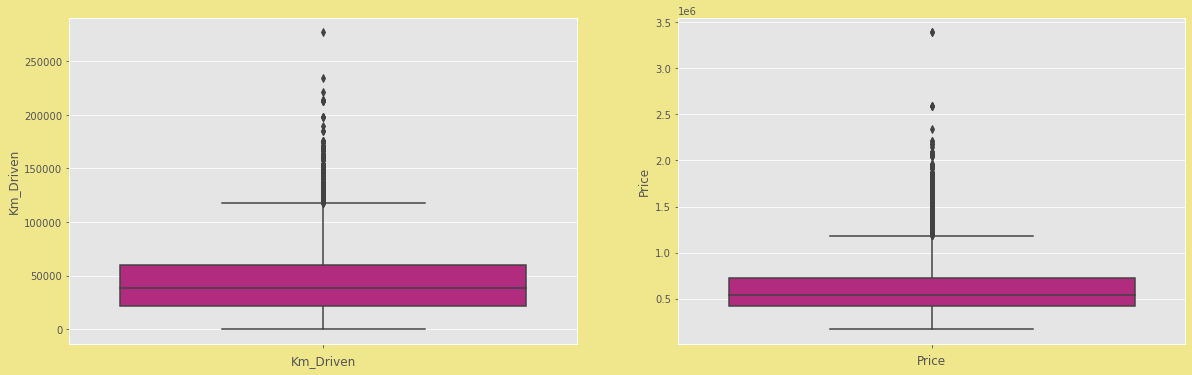

In [29]:
# Visualization  using boxplot
plt.figure(figsize=(20,6),facecolor='Khaki')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=3:
        ax = plt.subplot(1,2,plot_no)
        sns.boxplot(y=df1[column],color='MediumVioletRed')
        plt.xlabel(column,fontsize=12)
    plot_no += 1
plt.show()   

##### Outcome : 
* There is skewness in the dataset.
* Outliers also present in the dataset.

#### ii. Data visualization of object column

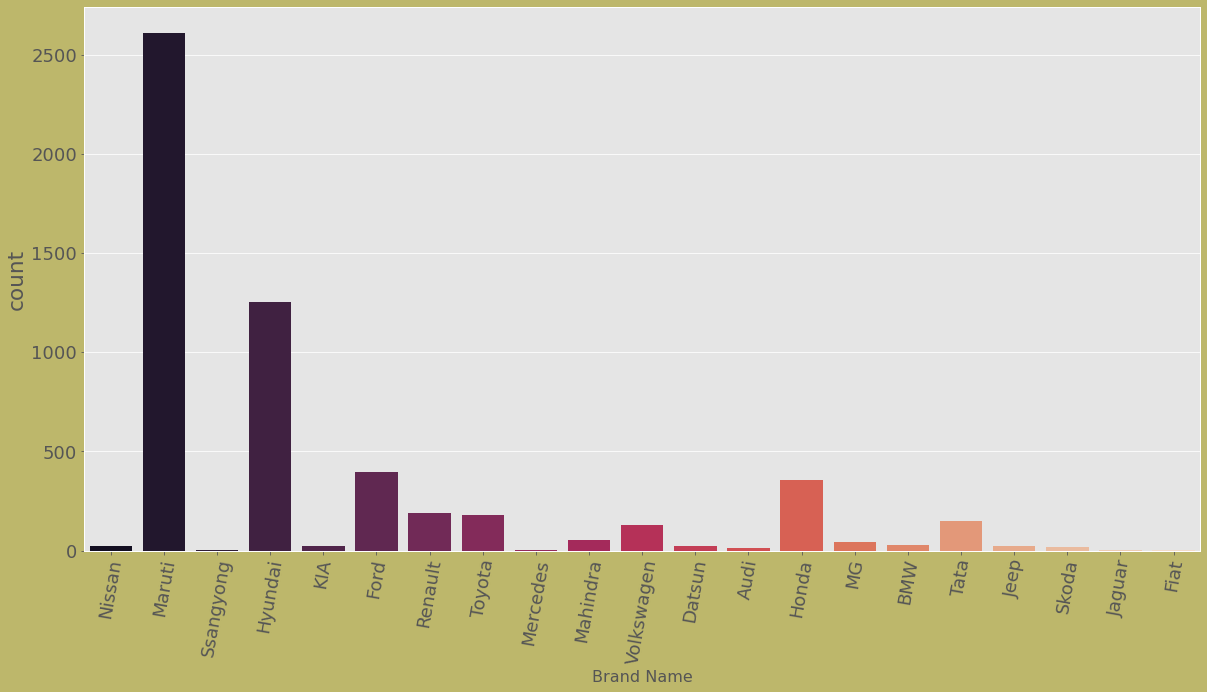

In [30]:
plt.figure(figsize=(20,10),facecolor='DarkKhaki')
plt.rcParams.update({'font.size': 18})
sns.countplot('Brand_Name',data=df,palette='rocket')
plt.xlabel('Brand Name',fontsize=16)
plt.xticks(rotation=80);

##### Outcome : Most available cars are of ‘Maruti’, followed by ‘Hyundai’. 

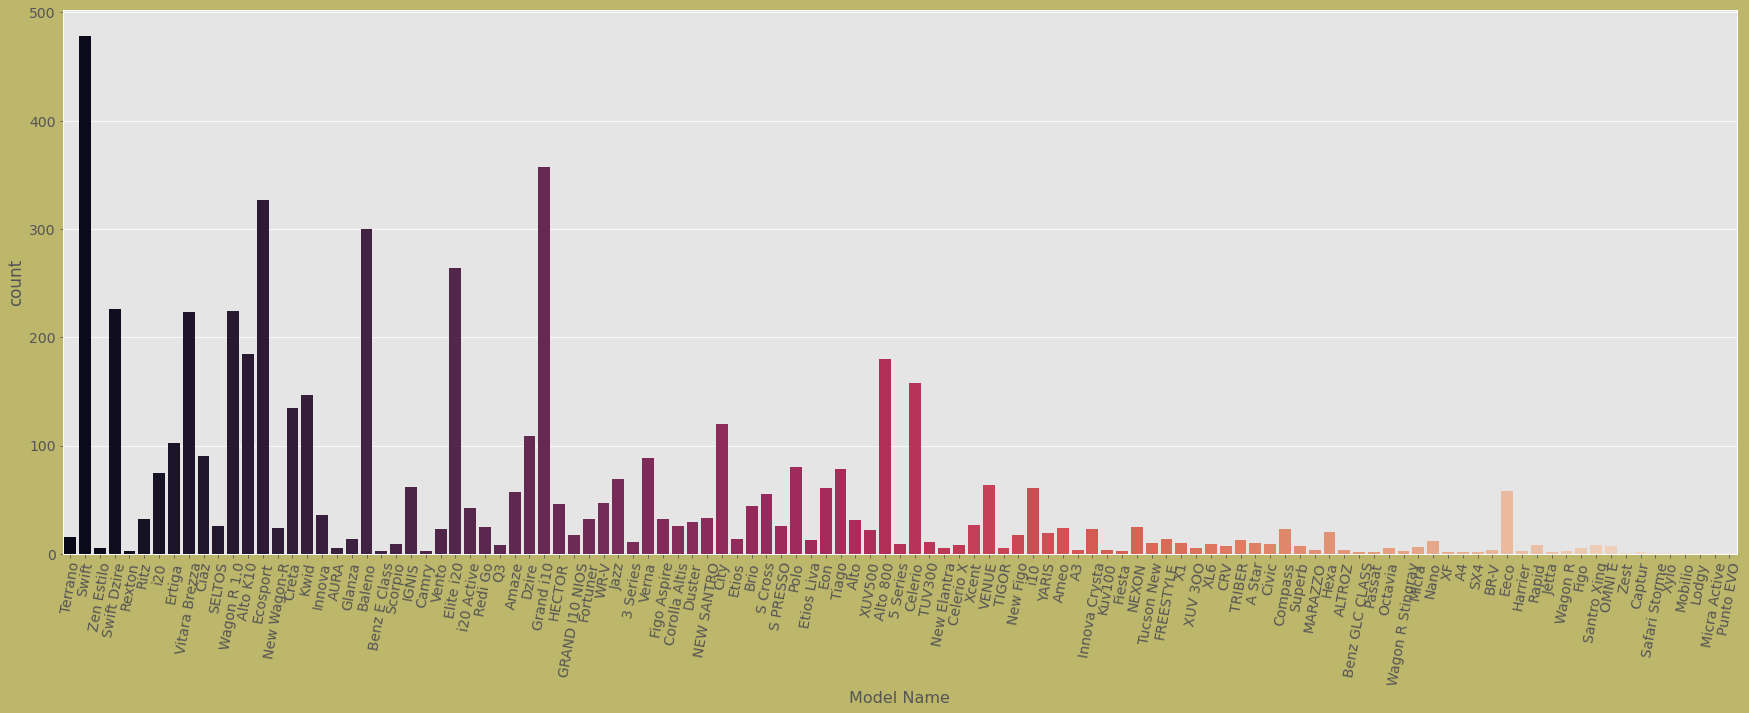

In [31]:
plt.figure(figsize=(30,10),facecolor='DarkKhaki')
plt.rcParams.update({'font.size': 14})
sns.countplot('Model_Name',data=df,palette='rocket')
plt.xlabel('Model Name',fontsize=16)
plt.xticks(rotation=80);

##### Outcome: Most available model are ‘Swift’ of ‘Maruti’, followed by ‘Grand i10’ of ‘Hyundai’.  

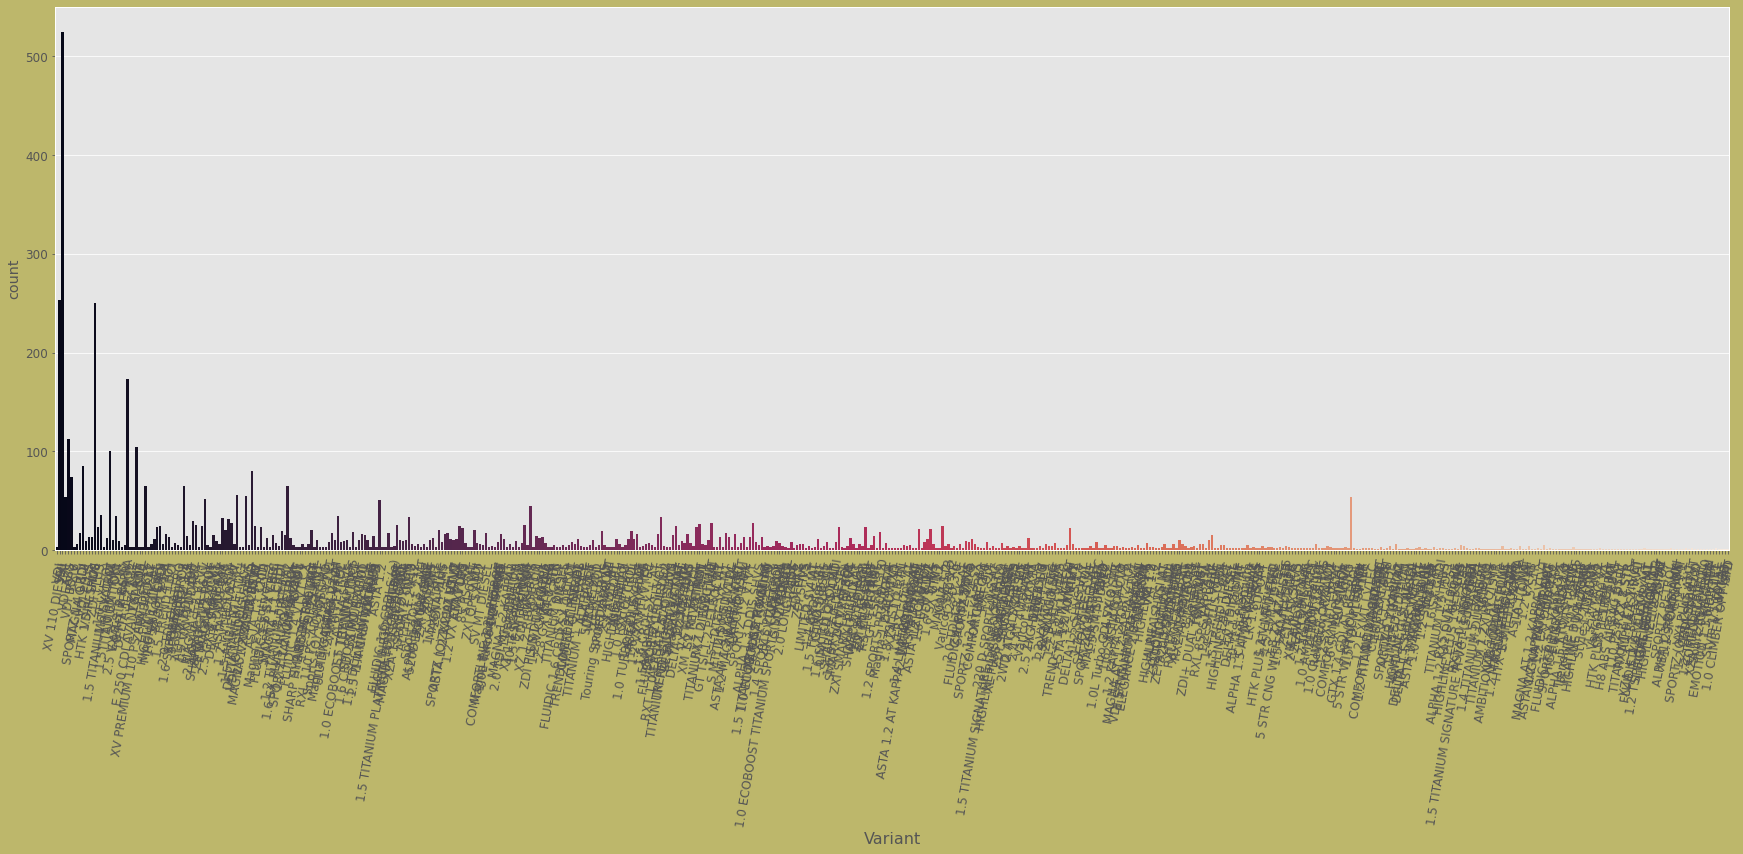

In [32]:
plt.figure(figsize=(30,10),facecolor='DarkKhaki')
plt.rcParams.update({'font.size': 12})
sns.countplot('Variant',data=df,palette='rocket')
plt.xlabel('Variant',fontsize=16)
plt.xticks(rotation=80);

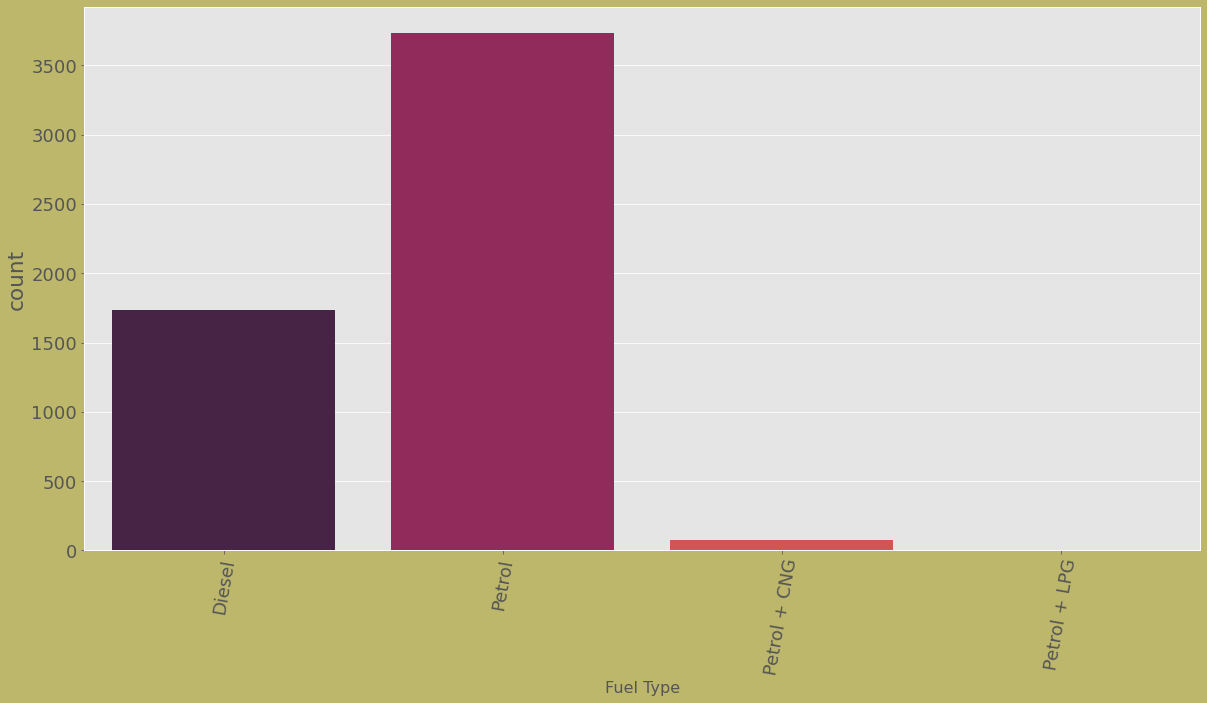

In [33]:
plt.figure(figsize=(20,10),facecolor='DarkKhaki')
plt.rcParams.update({'font.size': 18})
sns.countplot('Fuel_Type',data=df,palette='rocket')
plt.xlabel('Fuel Type',fontsize=16)
plt.xticks(rotation=80);

##### Outcome : Mostly have fuel type as ‘Petrol’.  

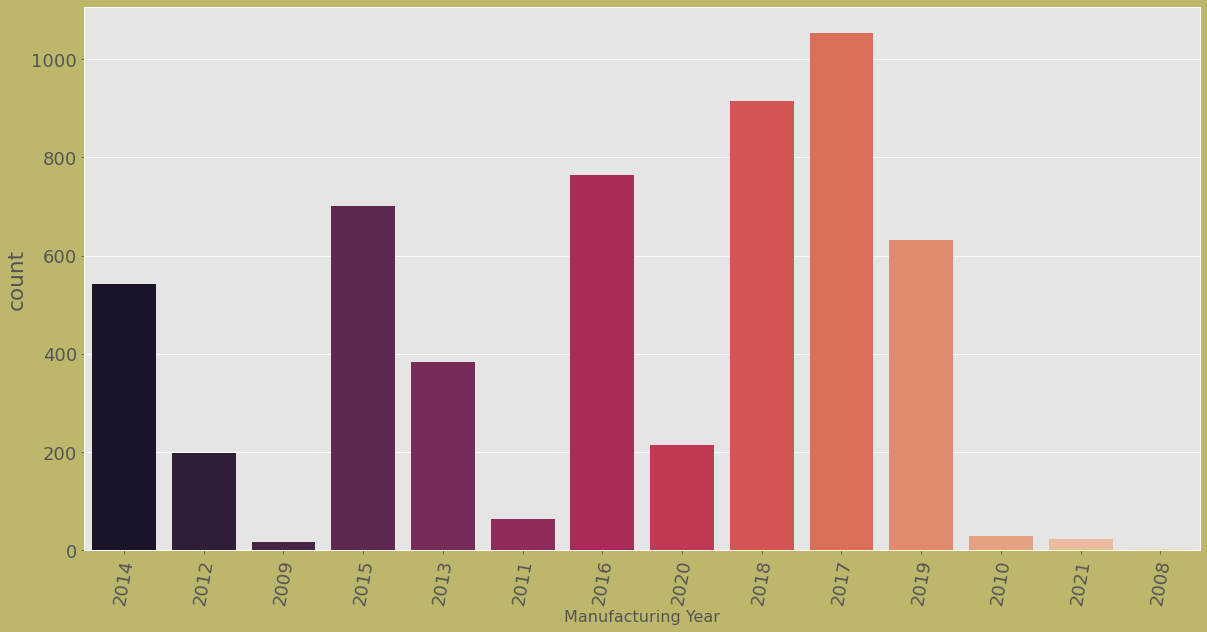

In [34]:
plt.figure(figsize=(20,10),facecolor='DarkKhaki')
plt.rcParams.update({'font.size': 18})
sns.countplot('Manufacturing_Year',data=df,palette='rocket')
plt.xlabel('Manufacturing Year',fontsize=16)
plt.xticks(rotation=80);

##### Outcome : The cars that have ‘Manufacturing Year’  as 2017 are most in counting, followed by 2018.

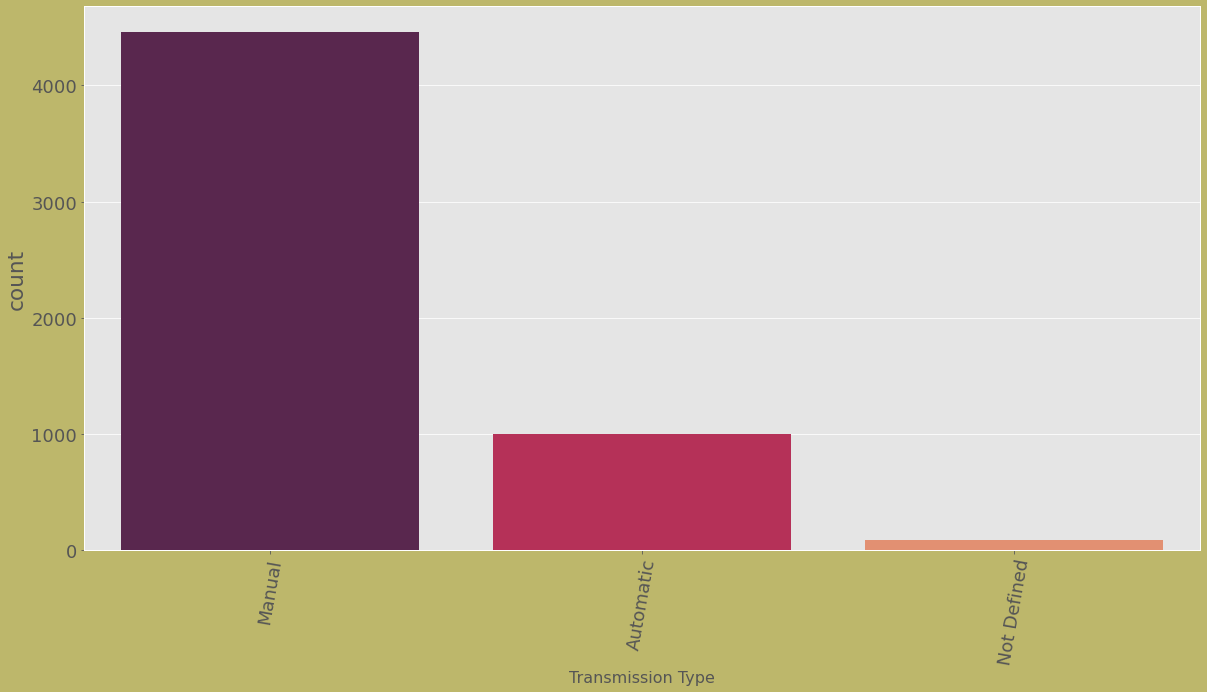

In [35]:
plt.figure(figsize=(20,10),facecolor='DarkKhaki')
plt.rcParams.update({'font.size': 18})
sns.countplot('Transmission_Type',data=df,palette='rocket')
plt.xlabel('Transmission Type',fontsize=16)
plt.xticks(rotation=80);

##### Outcome : ‘Transmission Type’ as ‘Manual’ are most.

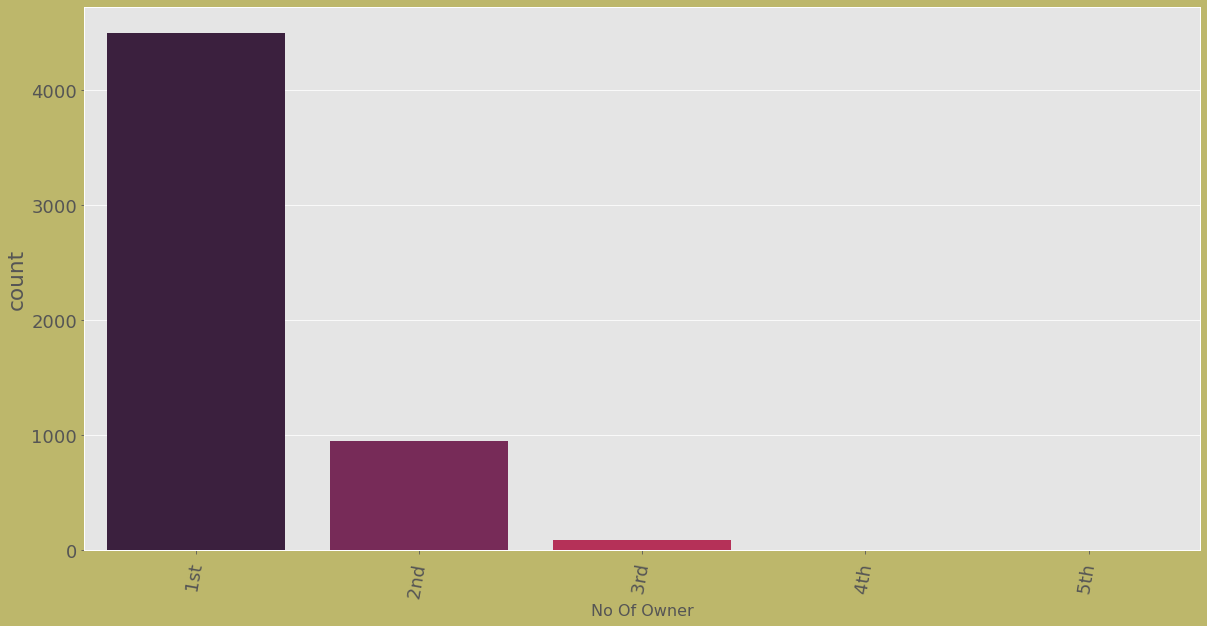

In [36]:
plt.figure(figsize=(20,10),facecolor='DarkKhaki')
plt.rcParams.update({'font.size': 18})
sns.countplot('No_Of_Owner',data=df,palette='rocket')
plt.xlabel('No Of Owner',fontsize=16)
plt.xticks(rotation=80);

##### Outcome : Mostly available cars have 1st owner as No_Of_Owner.

#### II). Bivariant Analysis

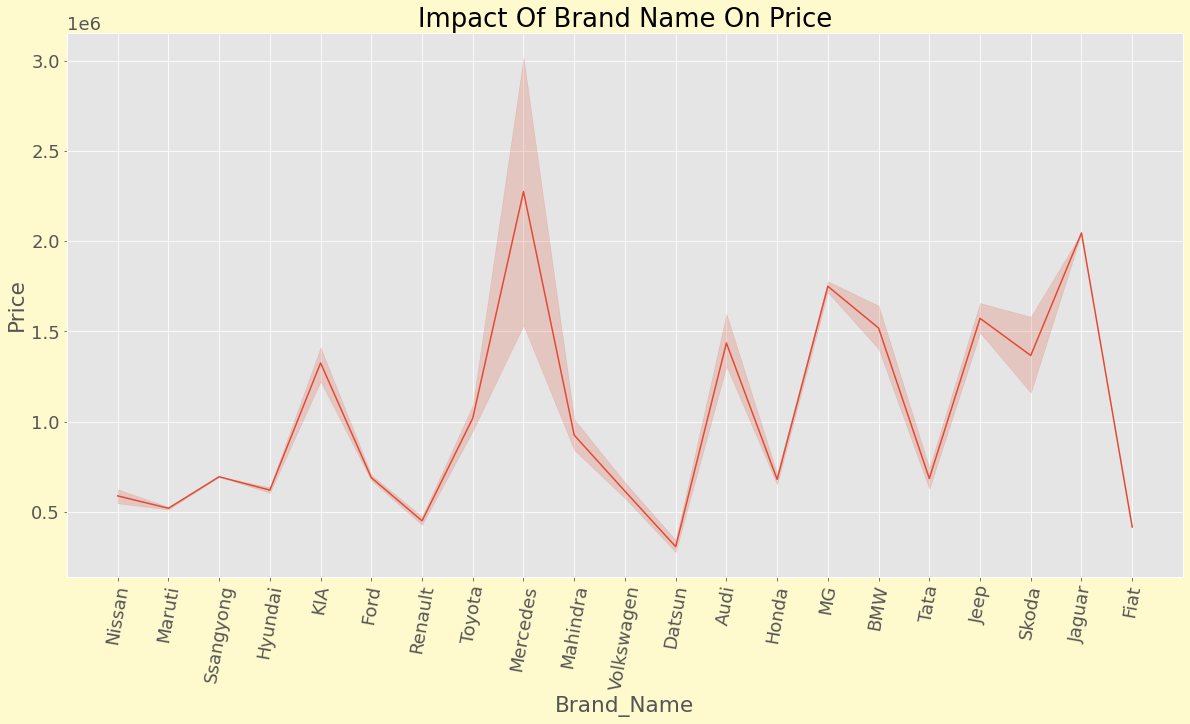

In [37]:
plt.figure(figsize=(20,10),facecolor='LemonChiffon')
sns.lineplot(x='Brand_Name',y='Price',data=df)
plt.title('Impact Of Brand Name On Price')
plt.xticks(rotation=80);

##### Outcome : ‘Mercedes’ cars are expensive, followed by ‘Jaguar’.

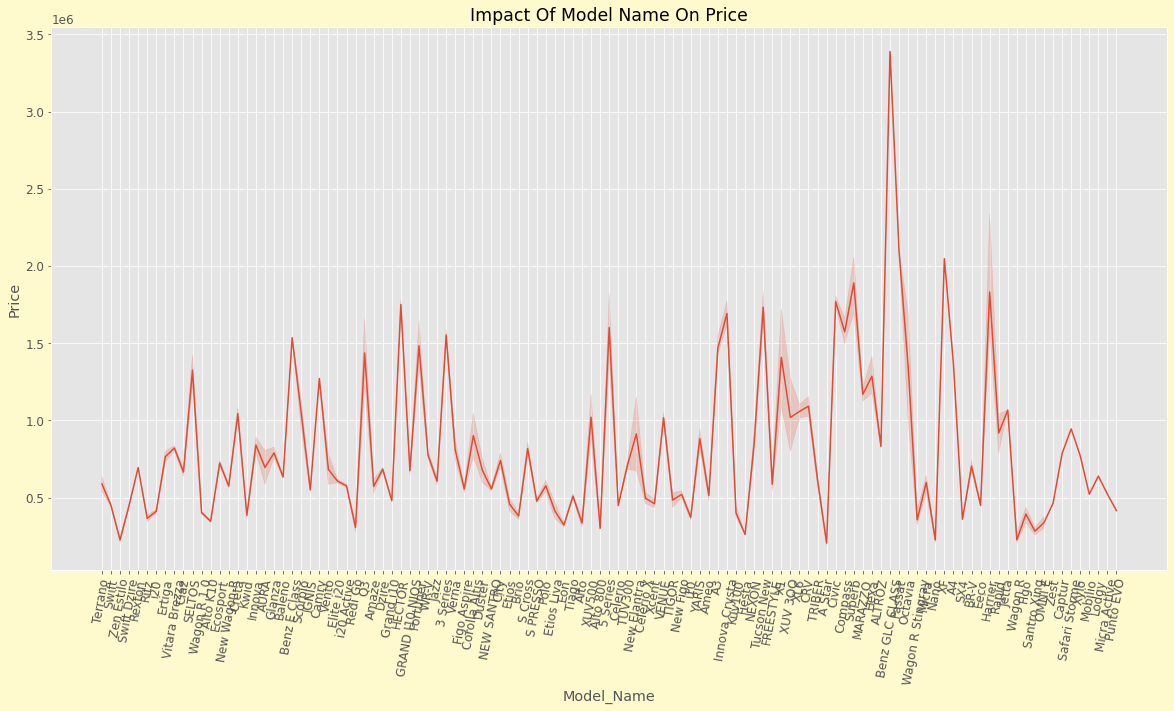

In [38]:
plt.figure(figsize=(20,10),facecolor='LemonChiffon')
plt.rcParams.update({'font.size': 12})
sns.lineplot(x='Model_Name',y='Price',data=df)
plt.title('Impact Of Model Name On Price')
plt.xticks(rotation=80);

##### Outcome : ‘Benz GLC Class’ of ‘Mercedes’ are the most expensive car  model in the dataset. 

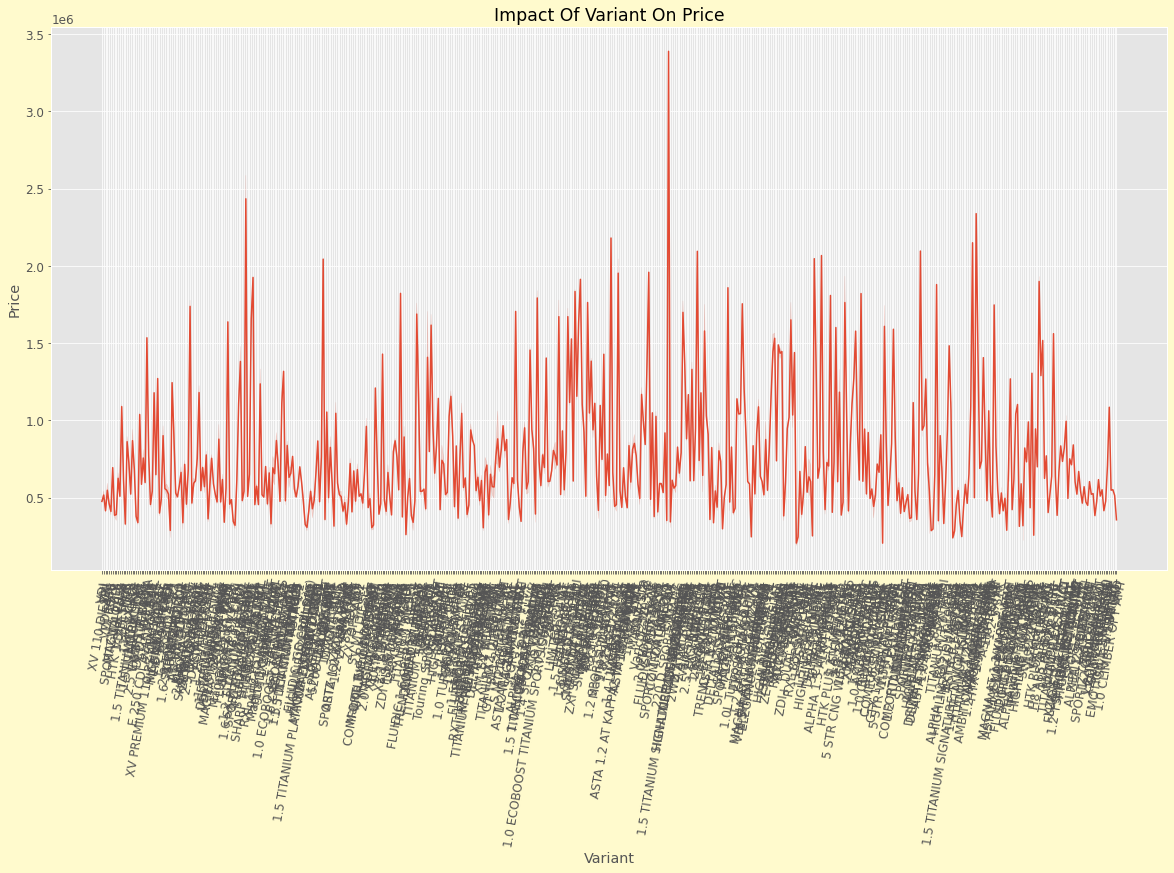

In [39]:
plt.figure(figsize=(20,10),facecolor='LemonChiffon')
sns.lineplot(x='Variant',y='Price',data=df)
plt.title('Impact Of Variant On Price')
plt.xticks(rotation=80);

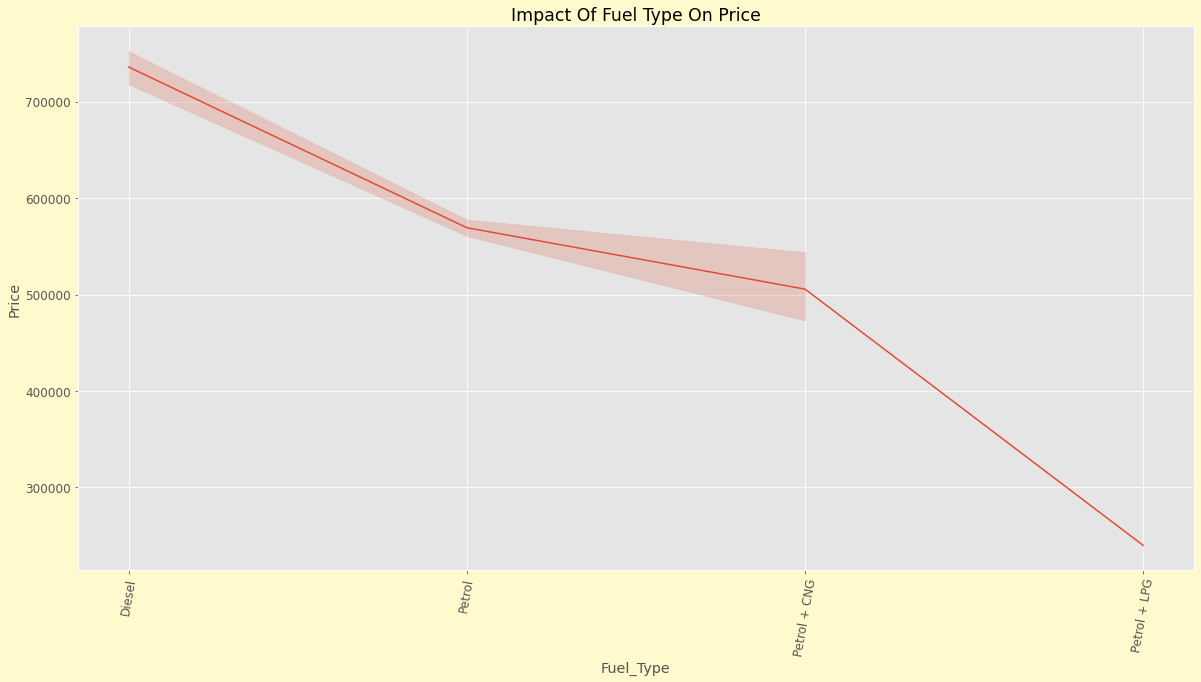

In [40]:
plt.figure(figsize=(20,10),facecolor='LemonChiffon')
sns.lineplot(x='Fuel_Type',y='Price',data=df)
plt.title('Impact Of Fuel Type On Price')
plt.xticks(rotation=80);

##### Outcome : ‘Diesel’ as ‘fuel_Type’  cars are costly.

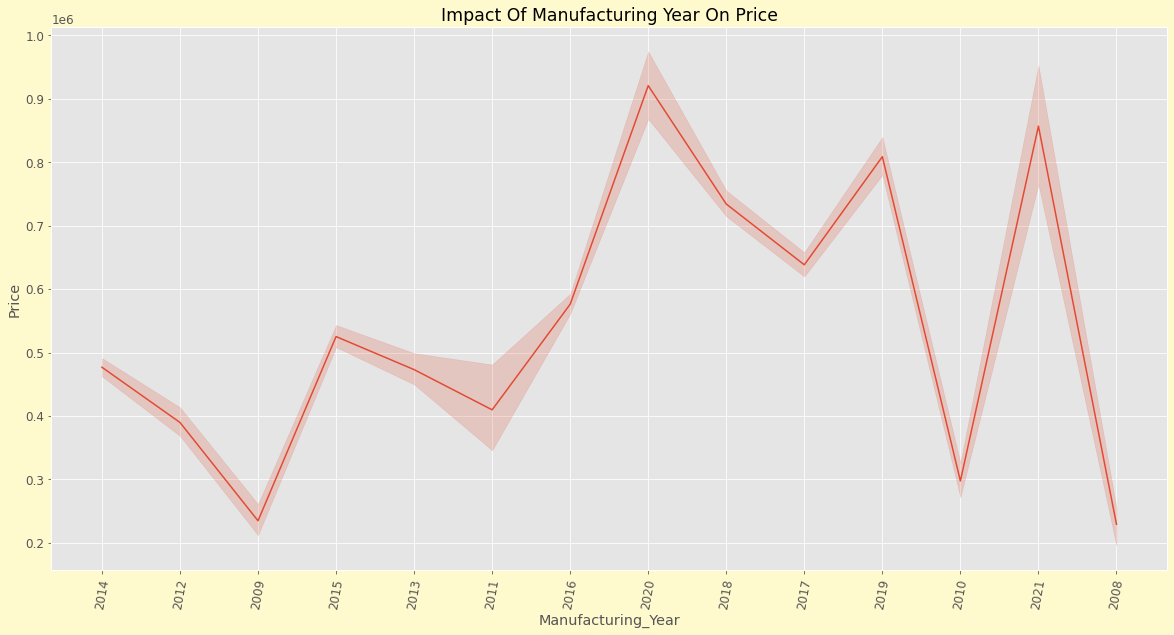

In [41]:
plt.figure(figsize=(20,10),facecolor='LemonChiffon')
sns.lineplot(x='Manufacturing_Year',y='Price',data=df)
plt.title('Impact Of Manufacturing Year On Price')
plt.xticks(rotation=80);

##### Outcome : ‘Price’ are high when ‘Manufacturing Year’ is 2020, followed by 2021.

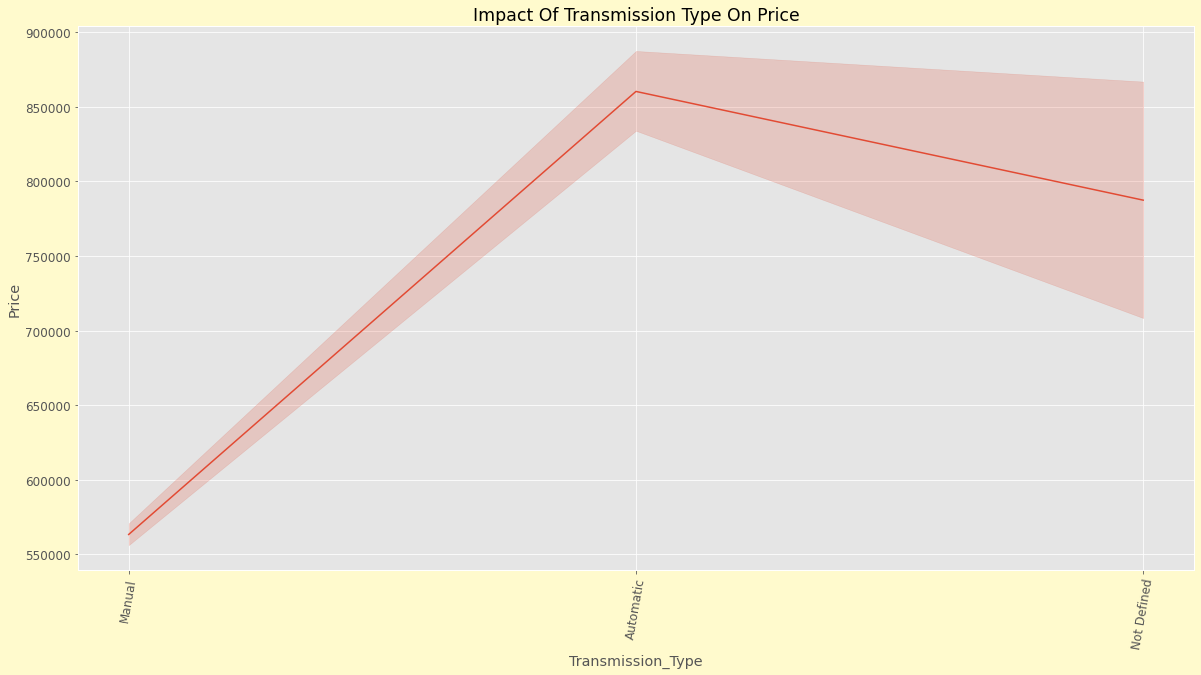

In [42]:
plt.figure(figsize=(20,10),facecolor='LemonChiffon')
sns.lineplot(x='Transmission_Type',y='Price',data=df)
plt.title('Impact Of Transmission Type On Price')
plt.xticks(rotation=80);

##### Outcome : ‘Automatic’ as ‘Transmission_Type are expensive.

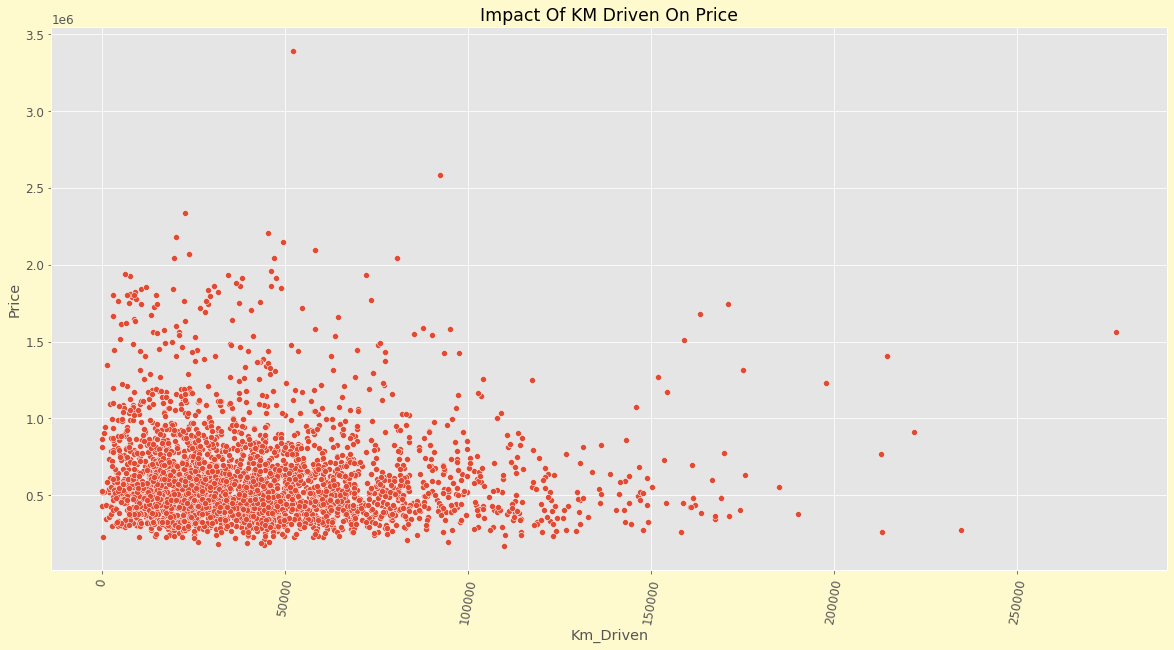

In [43]:
plt.figure(figsize=(20,10),facecolor='LemonChiffon')
sns.scatterplot(x='Km_Driven',y='Price',data=df)
plt.title('Impact Of KM Driven On Price')
plt.xticks(rotation=80);

##### Outcome : Mostly cars have ‘Km Driven’ between 0 to 10000 KM.

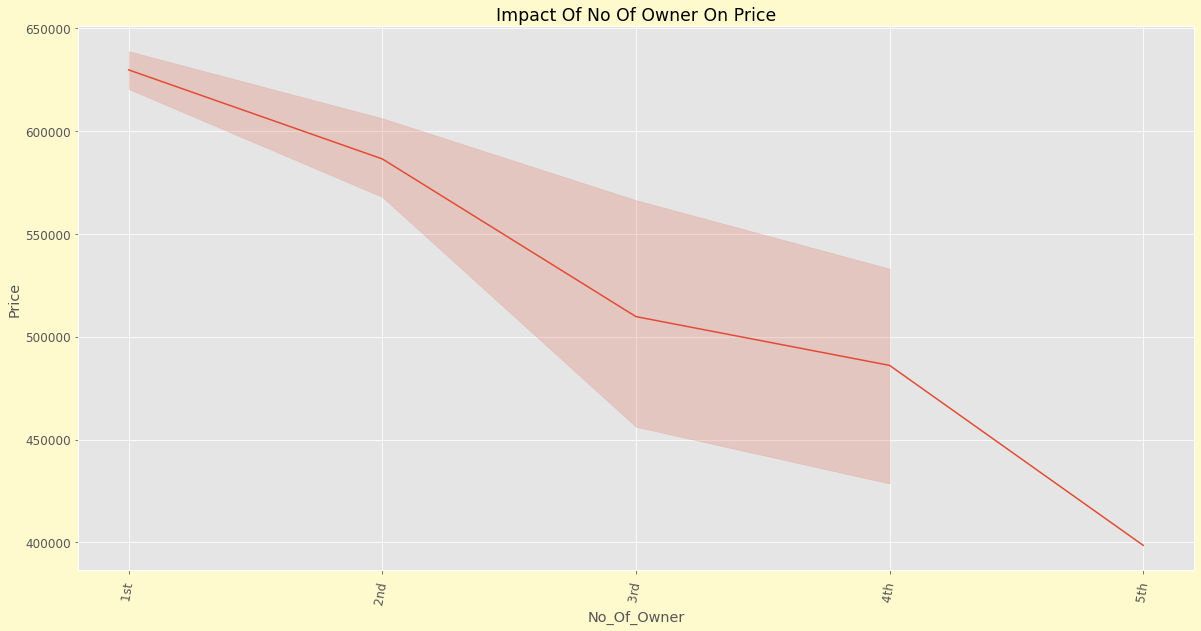

In [44]:
plt.figure(figsize=(20,10),facecolor='LemonChiffon')
sns.lineplot(x='No_Of_Owner',y='Price',data=df)
plt.title('Impact Of No Of Owner On Price')
plt.xticks(rotation=80);

##### Outcome : Cars ‘Price’ is high when the car has ‘No_Of_Owner’  as ‘1st owner’.

### 7. Features Engineering

#### a). Dealing with outliers

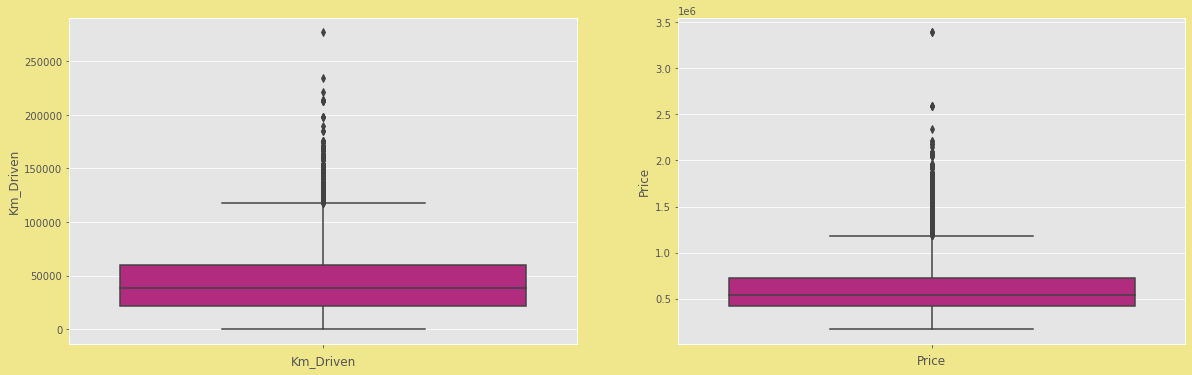

In [45]:
plt.figure(figsize=(20,6),facecolor='Khaki')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=3:
        ax = plt.subplot(1,2,plot_no)
        sns.boxplot(y=df1[column],color='MediumVioletRed')
        plt.xlabel(column,fontsize=12)
    plot_no += 1
plt.show() 

##### Outcome : Outliers present in 'Km_Driven' & 'Price'. 'Price' is target variable so no need to worry about. Dealing outliers only in 'Km_Driven'.

In [46]:
from scipy.stats import zscore

In [47]:
z_score = np.abs(zscore(df['Km_Driven']))
print(np.where(z_score>3))

(array([  13,   43,  115,  122,  125,  156,  170,  272,  394,  452,  659,
        663,  694,  724,  796,  803,  806,  837,  850,  952, 1074, 1131,
       1340, 1344, 1375, 1407, 1479, 1486, 1489, 1518, 1530, 1632, 1754,
       1813, 2021, 2025, 2087, 2306, 2342, 2401, 2404, 2507, 2540, 2543,
       2662, 2667, 2747, 2750, 2886, 2911, 2954, 2955, 2958, 2977, 3072,
       3194, 3195, 3198, 3217, 3313, 3448, 3482, 3562, 3565, 3702, 3751,
       3787, 3942, 3969, 4146, 4149, 4252, 4285, 4288, 4307, 4489, 4506,
       4559, 4629, 4791, 4830, 4864, 4865, 4978, 4984, 4985, 4991, 5005,
       5012, 5183, 5188, 5278, 5318, 5519], dtype=int64),)


In [48]:
df_o = df[(z_score<3)]
print('The shape before outlier remove is :',df.shape)
print('The shape after outlier remove is :',df_o.shape)
print('The loss of data in percentage is :',(df.shape[0]-df_o.shape[0])/df.shape[0]*100)

The shape before outlier remove is : (5545, 9)
The shape after outlier remove is : (5451, 9)
The loss of data in percentage is : 1.6952209197475203


#### b). Dealing with skewness

In [49]:
df_o.skew()

Manufacturing_Year   -0.481139
Km_Driven             0.918421
Price                 2.164334
dtype: float64

##### Outcome : Skewness treated only +/-0.5. Skewness present in 'Km_Driven' & 'Price'. 'Price' is target variable so no need to worry about. Dealing skewness only in 'Km_Driven'.

In [50]:
from sklearn.preprocessing import PowerTransformer

In [51]:
pt = PowerTransformer(method='yeo-johnson')

In [52]:
test = ['Km_Driven']

In [53]:
df_o[test] = pt.fit_transform(df_o[test].values)

In [54]:
df_o.skew()

Manufacturing_Year   -0.481139
Km_Driven            -0.039661
Price                 2.164334
dtype: float64

<AxesSubplot:xlabel='Km_Driven', ylabel='Density'>

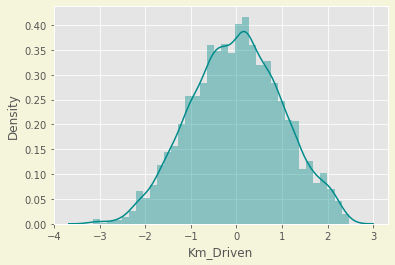

In [55]:
plt.figure(facecolor='Beige')
sns.distplot(df_o['Km_Driven'],color='DarkCyan')

#### c). Encoding object column

In [56]:
df_o.columns

Index(['Brand_Name', 'Model_Name', 'Variant', 'Fuel_Type',
       'Manufacturing_Year', 'Transmission_Type', 'Km_Driven', 'No_Of_Owner',
       'Price'],
      dtype='object')

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
lb = LabelEncoder()

In [59]:
df_o['Brand_Name'] = lb.fit_transform(df_o['Brand_Name'])
df_o['Model_Name'] = lb.fit_transform(df_o['Model_Name'])
df_o['Variant'] = lb.fit_transform(df_o['Variant'])
df_o['Fuel_Type'] = lb.fit_transform(df_o['Fuel_Type'])
df_o['Manufacturing_Year'] = lb.fit_transform(df_o['Manufacturing_Year'])
df_o['Transmission_Type'] = lb.fit_transform(df_o['Transmission_Type'])
df_o['No_Of_Owner'] = lb.fit_transform(df_o['No_Of_Owner'])

In [60]:
df_o

,Brand_Name,Model_Name,Variant,Fuel_Type,Manufacturing_Year,Transmission_Type,Km_Driven,No_Of_Owner,Price
0,14,88,501,0,6,1,0.240155,0,476199
1,12,83,435,0,4,1,2.087828,1,260099
2,12,106,457,1,1,1,0.251097,0,211499
3,12,83,545,1,4,1,1.241922,0,395299
4,12,83,437,0,7,1,1.458380,0,414499
...,...,...,...,...,...,...,...,...,...
5540,12,21,182,0,9,1,1.547221,0,691099
5541,16,71,409,0,10,0,0.867762,0,1077299
5542,15,53,336,1,9,1,-0.635336,0,369799
5543,6,43,309,1,9,1,-1.043845,0,484999


In [61]:
df_o.describe()

,Brand_Name,Model_Name,Variant,Fuel_Type,Manufacturing_Year,Transmission_Type,Km_Driven,No_Of_Owner,Price
count,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5.451000e+03,5451.000000,5.451000e+03
mean,10.077050,51.518620,319.826454,0.708310,8.290039,0.836360,1.975834e-16,0.206568,6.191474e+05
std,4.279365,32.044702,155.239355,0.484666,2.203186,0.411315,1.000092e+00,0.451583,3.131442e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.145024e+00,0.000000,1.716990e+05
25%,6.000000,26.000000,196.000000,0.000000,7.000000,1.000000,-6.915352e-01,0.000000,4.171990e+05
50%,12.000000,43.000000,340.000000,1.000000,9.000000,1.000000,2.372415e-02,0.000000,5.366990e+05
75%,12.000000,83.000000,457.000000,1.000000,10.000000,1.000000,7.006812e-01,0.000000,7.239490e+05
max,20.000000,110.000000,559.000000,3.000000,13.000000,2.000000,2.463419e+00,4.000000,3.388499e+06


In [62]:
df_o.nunique()

Brand_Name              21
Model_Name             111
Variant                560
Fuel_Type                4
Manufacturing_Year      14
Transmission_Type        3
Km_Driven             2945
No_Of_Owner              5
Price                 2382
dtype: int64

In [63]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5451 entries, 0 to 5544
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand_Name          5451 non-null   int32  
 1   Model_Name          5451 non-null   int32  
 2   Variant             5451 non-null   int32  
 3   Fuel_Type           5451 non-null   int32  
 4   Manufacturing_Year  5451 non-null   int32  
 5   Transmission_Type   5451 non-null   int32  
 6   Km_Driven           5451 non-null   float64
 7   No_Of_Owner         5451 non-null   int32  
 8   Price               5451 non-null   int64  
dtypes: float64(1), int32(7), int64(1)
memory usage: 276.8 KB


### 8. Correlation matrix to see the coffecient of multicolinearity

#### a). Visualize by matrix

In [64]:
df_corr = df_o.corr().abs()
df_corr

,Brand_Name,Model_Name,Variant,Fuel_Type,Manufacturing_Year,Transmission_Type,Km_Driven,No_Of_Owner,Price
Brand_Name,1.000000,0.135708,0.436156,0.037996,0.041476,0.009041,0.030774,0.045362,0.084700
Model_Name,0.135708,1.000000,0.192446,0.155078,0.148103,0.047855,0.096521,0.004109,0.017517
Variant,0.436156,0.192446,1.000000,0.030120,0.061147,0.054599,0.037256,0.007757,0.175509
Fuel_Type,0.037996,0.155078,0.030120,1.000000,0.153476,0.066442,0.419070,0.025521,0.243632
Manufacturing_Year,0.041476,0.148103,0.061147,0.153476,1.000000,0.135920,0.514967,0.161477,0.430634
Transmission_Type,0.009041,0.047855,0.054599,0.066442,0.135920,1.000000,0.076403,0.036295,0.304209
Km_Driven,0.030774,0.096521,0.037256,0.419070,0.514967,0.076403,1.000000,0.075630,0.113679
No_Of_Owner,0.045362,0.004109,0.007757,0.025521,0.161477,0.036295,0.075630,1.000000,0.066663
Price,0.084700,0.017517,0.175509,0.243632,0.430634,0.304209,0.113679,0.066663,1.000000


#### b). Visualize by heatmap

<AxesSubplot:>

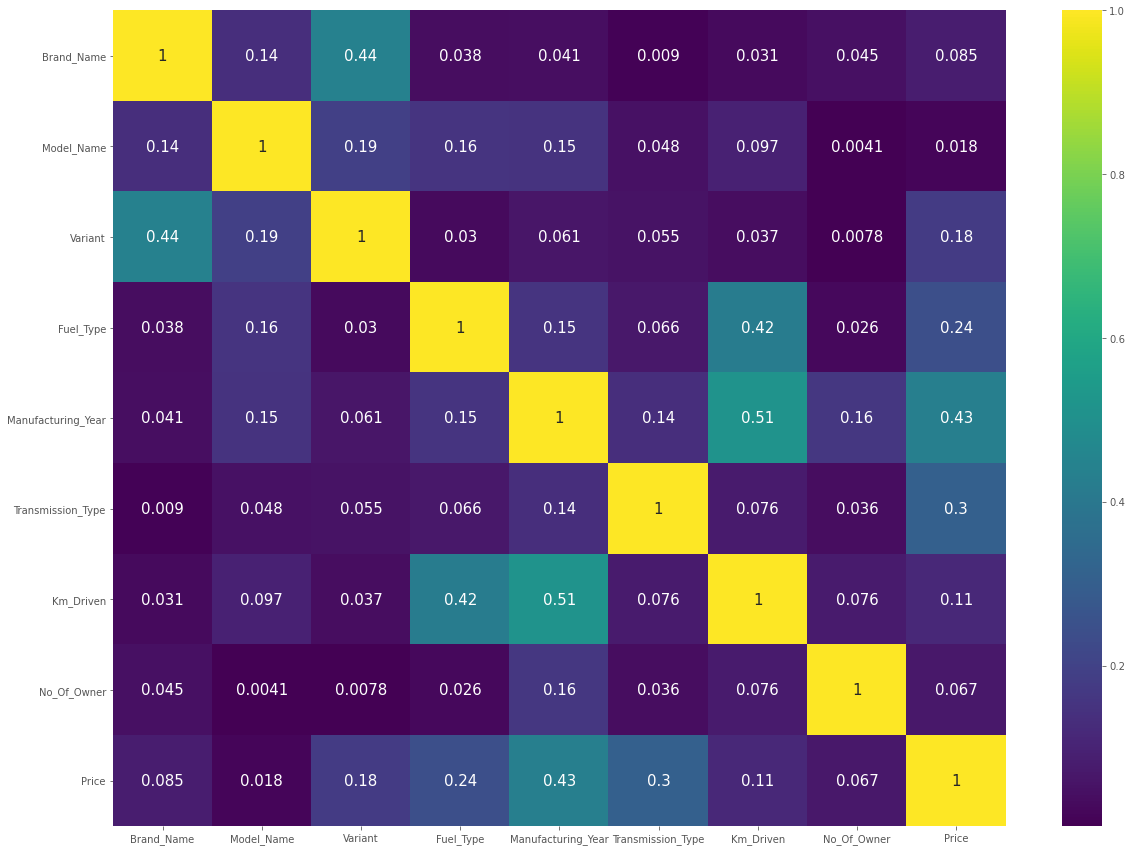

In [65]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True,annot_kws={'size':15},cmap='viridis')

##### Outcome : Features are not highly correlated.

### 9. Sepatating the dependent variable as y as Price and rest are independent variable as X

In [66]:
y = df_o['Price']
X = df_o.drop(columns='Price',axis=1)

### 10. Scaling the data set using Standard Scaler

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
ss = StandardScaler()

In [69]:
X_scaled = ss.fit_transform(X)

In [70]:
X_scaled

array([[ 0.91679728,  1.13855721,  1.16716645, ...,  0.39788122,
         0.24015459, -0.45747161],
       [ 0.4493953 ,  0.98251086,  0.74197752, ...,  0.39788122,
         2.0878282 ,  1.75716228],
       [ 0.4493953 ,  1.70032407,  0.88370717, ...,  0.39788122,
         0.25109687, -0.45747161],
       ...,
       [ 1.15049827,  0.04623277,  0.10419413, ...,  0.39788122,
        -0.63533603, -0.45747161],
       [-0.95281064, -0.26585992, -0.06974679, ...,  0.39788122,
        -1.04384488, -0.45747161],
       [ 0.4493953 ,  0.42074401,  0.47140275, ...,  2.82932799,
        -0.82319611,  3.97179617]])

### 11. Checking multicolinearity using VIF

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,1.254731,Brand_Name
1,1.084725,Model_Name
2,1.271869,Variant
3,1.249741,Fuel_Type
4,1.454812,Manufacturing_Year
5,1.026899,Transmission_Type
6,1.629705,Km_Driven
7,1.034527,No_Of_Owner


##### Outcome : All looks good. There is no multicolinearity.

### 12. Observing best random state & split the data using best random state

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [74]:
lr = KNeighborsRegressor()
max_accuracy = 0
max_rs = 0
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=i)
    lr.fit(X_train,y_train)
    lr_pred_test = lr.predict(X_test)
    accuracy = r2_score(y_test,lr_pred_test)
    if accuracy>max_accuracy:
        max_accuracy = accuracy
        max_rs = i
print('Maximum accuracy is :',max_accuracy,'On random state :',max_rs)

Maximum accuracy is : 0.7548256029919308 On random state : 87


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=max_rs)

### 13.  Initiate our model

#### a). Linear Regression Model

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()
lr.fit(X_train,y_train)
score_pred_lr = lr.score(X_test,y_test)*100
y_pred_lr = lr.predict(X_test)
mse_lr=mean_squared_error(y_test,y_pred_lr)
score_lr=np.sqrt(mse_lr)
r2_score_lr = r2_score(y_test,y_pred_lr)
print('The score by Linear Regression on test set is :',score_pred_lr)
print('The MSE score is :',mse_lr)
print('The RMSE score is :',score_lr)
print('The r2 score is :',r2_score_lr)

The score by Linear Regression on test set is : 39.40988970330724
The MSE score is : 53406295826.016106
The RMSE score is : 231098.0221161923
The r2 score is : 0.39409889703307244


#### Cross Validation on Linear Regression Model

In [78]:
score=cross_val_score(lr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_lr=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_lr),np.std(score_cross_lr))

The cross validation score : 253412.18441640228 23140.184253814587


#### b). KNN Model

In [79]:
kn = KNeighborsRegressor()
kn.fit(X_train,y_train)
score_pred_kn = kn.score(X_test,y_test)*100
y_pred_kn = kn.predict(X_test)
mse_kn=mean_squared_error(y_test,y_pred_kn)
score_kn=np.sqrt(mse_kn)
r2_score_kn = r2_score(y_test,y_pred_kn)
print('The score by K-Neighbors Regressor on test set is :',score_pred_kn)
print('The MSE score is :',mse_kn)
print('The RMSE score is :',score_kn)
print('The r2 score is :',r2_score_kn)

The score by K-Neighbors Regressor on test set is : 75.48256029919308
The MSE score is : 21610550486.640682
The RMSE score is : 147005.27366948672
The r2 score is : 0.7548256029919308


#### Cross Validation K-Neighbors Regressor

In [80]:
score=cross_val_score(kn,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_kn=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_kn),np.std(score_cross_kn))

The cross validation score : 180203.42839845904 27115.256460315137


#### c). Decision Tree Model

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
score_pred_dt = dt.score(X_test,y_test)*100
y_pred_dt = dt.predict(X_test)
mse_dt=mean_squared_error(y_test,y_pred_dt)
score_dt=np.sqrt(mse_dt)
r2_score_dt = r2_score(y_test,y_pred_dt)
print('The score by  Decision TreeRegressor on test set is :',score_pred_dt)
print('The MSE score is :',mse_dt)
print('The RMSE score is :',score_dt)
print('The r2 score is :',r2_score_dt)

The score by  Decision TreeRegressor on test set is : 92.6222773494591
The MSE score is : 6502989290.953546
The RMSE score is : 80641.1141475212
The r2 score is : 0.9262227734945909


#### Cross Validation Decision Tree Regressor

In [83]:
score=cross_val_score(dt,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_dt=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_dt),np.std(score_cross_dt))

The cross validation score : 96202.37983892934 28909.884879279714


#### d). Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
score_pred_rf = rf.score(X_test,y_test)*100
y_pred_rf = rf.predict(X_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
score_rf=np.sqrt(mse_rf)
r2_score_rf = r2_score(y_test,y_pred_rf)
print('The score by  Random Forest Regressor on test set is :',score_pred_rf)
print('The MSE score is :',mse_rf)
print('The RMSE score is :',score_rf)
print('The r2 score is :',r2_score_rf)

The score by  Random Forest Regressor on test set is : 95.48496717076793
The MSE score is : 3979711833.5218534
The RMSE score is : 63084.957268130514
The r2 score is : 0.9548496717076793


#### Cross Validation Random Forest Regressor

In [86]:
score=cross_val_score(rf,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_rf=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_rf),np.std(score_cross_rf))

The cross validation score : 77470.15337006727 11464.55833520743


#### e). Bagging Regressor

In [87]:
from sklearn.ensemble import BaggingRegressor

In [88]:
br = BaggingRegressor()
br.fit(X_train,y_train)
score_pred_br = br.score(X_test,y_test)*100
y_pred_br = br.predict(X_test)
mse_br=mean_squared_error(y_test,y_pred_br)
score_br=np.sqrt(mse_br)
r2_score_br = r2_score(y_test,y_pred_br)
print('The score by  Bagging Regressor on test set is :',score_pred_br)
print('The MSE score is :',mse_br)
print('The RMSE score is :',score_br)
print('The r2 score is :',r2_score_br)

The score by  Bagging Regressor on test set is : 95.1592193793664
The MSE score is : 4266837617.3679824
The RMSE score is : 65321.03502982774
The r2 score is : 0.951592193793664


#### Cross Validation on Bagging Regressor

In [89]:
score=cross_val_score(br,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_br=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_br),np.std(score_cross_br))

The cross validation score : 87284.22734648972 9391.777711264522


#### f). Ada Boost Regressor

In [90]:
from sklearn.ensemble import AdaBoostRegressor

In [91]:
ar = AdaBoostRegressor()
ar.fit(X_train,y_train)
score_pred_ar = ar.score(X_test,y_test)*100
y_pred_ar = ar.predict(X_test)
mse_ar=mean_squared_error(y_test,y_pred_ar)
score_ar=np.sqrt(mse_ar)
r2_score_ar = r2_score(y_test,y_pred_ar)
print('The score by  Ada Boost Regressor on test set is :',score_pred_ar)
print('The MSE score is :',mse_ar)
print('The RMSE score is :',score_ar)
print('The r2 score is :',r2_score_ar)

The score by  Ada Boost Regressor on test set is : 34.45226524653692
The MSE score is : 57776123790.284065
The RMSE score is : 240366.64450435727
The r2 score is : 0.3445226524653692


#### Corss Validation on Ada Boost Regressor

In [92]:
score=cross_val_score(ar,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_ar=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_ar),np.std(score_cross_ar))

The cross validation score : 245946.70234909054 8033.10011676742


#### g). Gradient Boosting Regressor

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

In [94]:
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)
score_pred_gr = gr.score(X_test,y_test)*100
y_pred_gr = gr.predict(X_test)
mse_gr=mean_squared_error(y_test,y_pred_gr)
score_gr=np.sqrt(mse_gr)
r2_score_gr = r2_score(y_test,y_pred_gr)
print('The score by  Gradient Boosting Regressor on test set is :',score_pred_gr)
print('The MSE score is :',mse_gr)
print('The RMSE score is :',score_gr)
print('The r2 score is :',r2_score_gr)

The score by  Gradient Boosting Regressor on test set is : 87.50122612932525
The MSE score is : 11016867464.526985
The RMSE score is : 104961.26649639373
The r2 score is : 0.8750122612932525


#### Corss Validation on Gradient Boosting Regressor

In [95]:
score=cross_val_score(gr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_gr=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_gr),np.std(score_cross_gr))

The cross validation score : 118796.07614301945 12218.676996938124


#### h). XGB Boost

In [96]:
import xgboost as xb

In [97]:
xr = xb.XGBRegressor()
xr.fit(X_train,y_train)
score_pred_xr = xr.score(X_test,y_test)*100
y_pred_xr = xr.predict(X_test)
mse_xr=mean_squared_error(y_test,y_pred_xr)
score_xr=np.sqrt(mse_xr)
r2_score_xr = r2_score(y_test,y_pred_xr)
print('The score by  XGB Boost Regressor on test set is :',score_pred_xr)
print('The MSE score is :',mse_xr)
print('The RMSE score is :',score_xr)
print('The r2 score is :',r2_score_xr)

The score by  XGB Boost Regressor on test set is : 96.00581662521839
The MSE score is : 3520616448.004484
The RMSE score is : 59334.782783831644
The r2 score is : 0.9600581662521839


#### Corss Validation on XGB Regressor

In [98]:
score=cross_val_score(xr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_xr=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_xr),np.std(score_cross_xr))

The cross validation score : 69061.97887346652 9816.575122542483


### 14. Observing the score

In [99]:
all_score = pd.DataFrame({})
all_score['Name Of Model'] = ['Linear Regression','K-Neighbors Regressor','Decision Tree Regressor','Random Forest Regressor','Bagging Regressor','Ada Boost Regressor','Gradient Boosting Regressor','XGB Regressor']
all_score['Score On Test'] = [score_pred_lr,score_pred_kn,score_pred_dt,score_pred_rf,score_pred_br,score_pred_ar,score_pred_gr,score_pred_xr]
all_score['R2 Score'] = [r2_score_lr,r2_score_kn,r2_score_dt,r2_score_rf,r2_score_br,r2_score_ar,r2_score_gr,r2_score_xr]
all_score['RMSE'] = [score_lr,score_kn,score_dt,score_rf,score_br,score_ar,score_gr,score_xr]
all_score['MSE'] = [mse_lr,mse_kn,mse_dt,mse_rf,mse_br,mse_ar,mse_gr,mse_xr]
all_score['CV Score'] = [np.mean(score_cross_lr),np.mean(score_cross_kn),np.mean(score_cross_dt),np.mean(score_cross_rf),np.mean(score_cross_br),np.mean(score_cross_ar),np.mean(score_cross_gr),np.mean(score_cross_xr)]

In [100]:
all_score

,Name Of Model,Score On Test,R2 Score,RMSE,MSE,CV Score
0,Linear Regression,39.409890,0.394099,231098.022116,5.340630e+10,253412.184416
1,K-Neighbors Regressor,75.482560,0.754826,147005.273669,2.161055e+10,180203.428398
2,Decision Tree Regressor,92.622277,0.926223,80641.114148,6.502989e+09,96202.379839
3,Random Forest Regressor,95.484967,0.954850,63084.957268,3.979712e+09,77470.153370
4,Bagging Regressor,95.159219,0.951592,65321.035030,4.266838e+09,87284.227346
5,Ada Boost Regressor,34.452265,0.344523,240366.644504,5.777612e+10,245946.702349
6,Gradient Boosting Regressor,87.501226,0.875012,104961.266496,1.101687e+10,118796.076143
7,XGB Regressor,96.005817,0.960058,59334.782784,3.520616e+09,69061.978873


Text(0.5, 1.0, 'Test Score Analysis')

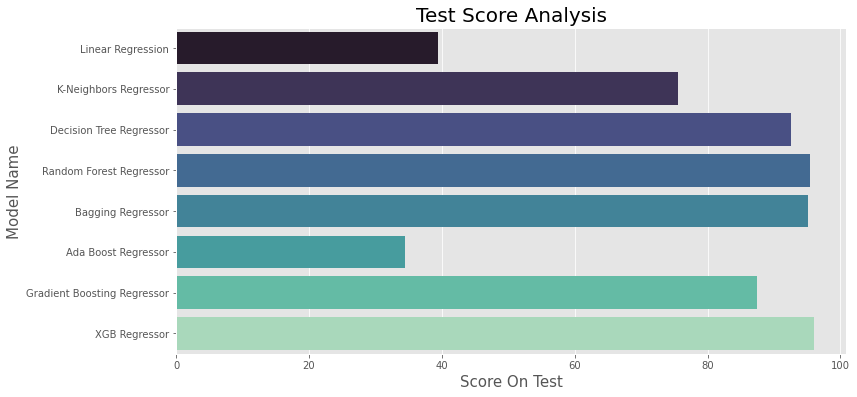

In [101]:
plt.figure(figsize=(12,6))
sns.barplot('Score On Test','Name Of Model',data=all_score,palette = "mako")
plt.xlabel('Score On Test',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Test Score Analysis',fontsize=20)

Text(0.5, 1.0, 'RMSE Score Analysis')

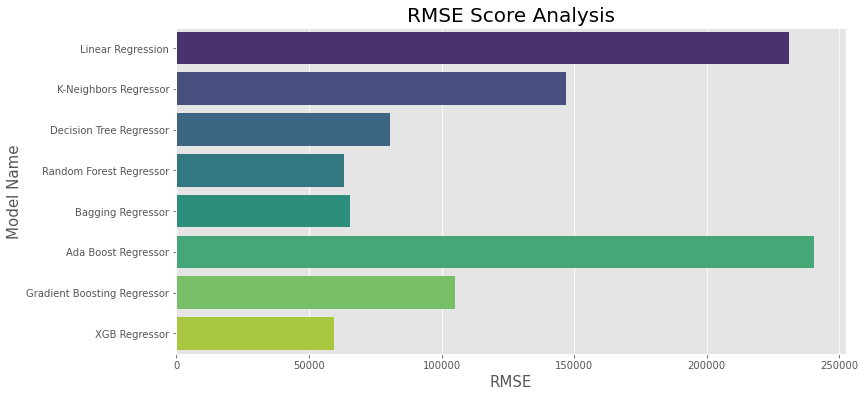

In [102]:
plt.figure(figsize=(12,6))
sns.barplot('RMSE','Name Of Model',data=all_score,palette = "viridis")
plt.xlabel('RMSE',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('RMSE Score Analysis',fontsize=20)

Text(0.5, 1.0, 'CV Score Analysis')

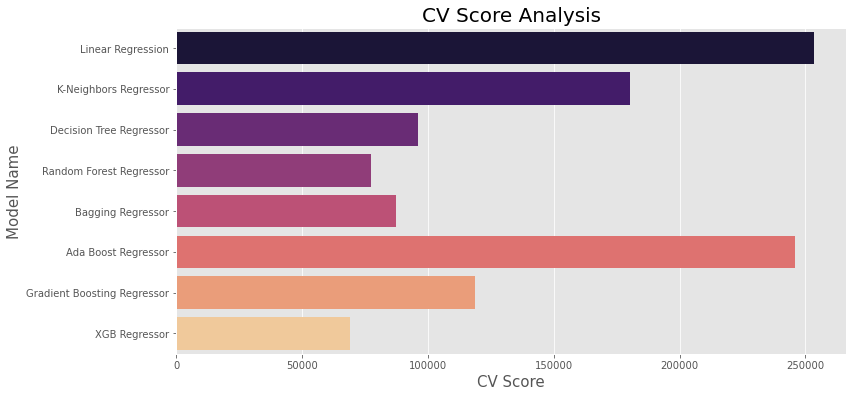

In [103]:
plt.figure(figsize=(12,6))
sns.barplot('CV Score','Name Of Model',data=all_score,palette = "magma")
plt.xlabel('CV Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('CV Score Analysis',fontsize=20)

Text(0.5, 1.0, 'R2 Score Analysis')

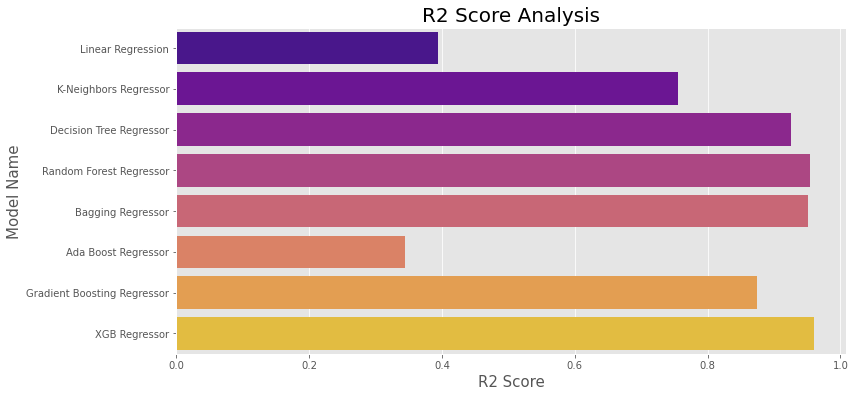

In [104]:
plt.figure(figsize=(12,6))
sns.barplot('R2 Score','Name Of Model',data=all_score,palette = "plasma")
plt.xlabel('R2 Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('R2 Score Analysis',fontsize=20)

##### Outcome : R2 score of Random Forest Regressor and XGB Regressor are also good. The RMSE score of XGB Regressor is less. Cross validation score is less for XGB Regressor as compared with Random Forest Regressor. So, XGB Regressor is final model on this dataset.


### 15. Hyperparameter tunning on XGB regressor using GridSearch CV

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
clf = xb.XGBRegressor()
param = {'n_estimators':[100,150,200],
         'learning_rate' : [0.1,0.01,0.8],
         'max_depth' : [3,5,7,10],
         'subsample' : [0.1,0.5,0.9,1] 
         }

grd = GridSearchCV(clf,param_grid=param,scoring='neg_mean_squared_error',cv=10)
grd.fit(X_train,y_train)


clf = grd.best_estimator_

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Best parameter",grd.best_params_)
print("r2 score after hyper parameter tunning",r2_score(y_test,y_pred))

Best parameter {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.9}
r2 score after hyper parameter tunning 0.9638193049841267


##### Outcome : After hyperparameter tuning, I am able to improve the performance.  So, using these best parameters we fitted the model and saved the model.


### 16. Fit the model using best parameter

In [107]:
xr = xb.XGBRegressor(n_estimators=200,learning_rate=0.1,max_depth=10,subsample=0.9)
xr.fit(X_train,y_train)
score_pred_xr = xr.score(X_test,y_test)*100
y_pred_xr = xr.predict(X_test)
mse_xr=mean_squared_error(y_test,y_pred_xr)
score_xr=np.sqrt(mse_xr)
r2_score_xr = r2_score(y_test,y_pred_xr)
print('The score by  XGB Boost Regressor on test set is :',score_pred_xr)
print('The MSE score is :',mse_xr)
print('The RMSE score is :',score_xr)
print('The r2 score is :',r2_score_xr)

The score by  XGB Boost Regressor on test set is : 96.38193049841267
The MSE score is : 3189096193.66391
The RMSE score is : 56472.083312588264
The r2 score is : 0.9638193049841267


### 17. Saving model

In [108]:
import pickle

In [109]:
final_result = 'Used car price prediction.pickle'
pickle.dump(xr,open(final_result,'wb'))

### 18. Load the model and see prediction

In [110]:
finalize_model = open('Used car price prediction.pickle','rb')
model = pickle.load(finalize_model)

In [111]:
prediction = model.predict(X_test)
prediction

array([ 396916.4 ,  360969.84,  641982.3 , ..., 1182348.  ,  863041.6 ,
        508254.2 ], dtype=float32)

In [112]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=['Prediction','Actual'])

,0,1,2,3,4,5,6,7,8,9,...,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635
Prediction,396916.40625,360969.84375,6.419823e+05,856194.875,1427893.625,453957.71875,576635.3125,406862.875,505564.53125,424242.09375,...,1679567.5,485430.40625,593150.3125,583852.0,466899.5,1098934.125,417180.3125,1182348.0,863041.625,508254.1875
Actual,398899.00000,337699.00000,1.049199e+06,901799.000,1435599.000,455499.00000,506799.0000,401699.000,508699.00000,423699.00000,...,1689299.0,476399.00000,578399.0000,604799.0,475699.0,1093199.000,434899.0000,1208699.0,901699.000,460699.0000
